In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import StrMethodFormatter
import matplotlib.ticker as ticker
import pandas as pd
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler
from scipy import stats
import scipy as sp
from statsmodels.stats.outliers_influence import variance_inflation_factor
import warnings
warnings.filterwarnings("ignore", message="divide by zero encountered in double_scalars")

In [2]:
ames=pd.read_csv('Ames_HousePrice.csv',index_col=0)
pd.set_option('display.max_columns', None)
ames.head()

PID  GrLivArea  SalePrice  MSSubClass MSZoning  LotFrontage  LotArea  \
1  909176150        856     126000          30       RL          NaN     7890   
2  905476230       1049     139500         120       RL         42.0     4235   
3  911128020       1001     124900          30  C (all)         60.0     6060   
4  535377150       1039     114000          70       RL         80.0     8146   
5  534177230       1665     227000          60       RL         70.0     8400   

  Street Alley LotShape LandContour Utilities LotConfig LandSlope  \
1   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
2   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
3   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   
4   Pave   NaN      Reg         Lvl    AllPub    Corner       Gtl   
5   Pave   NaN      Reg         Lvl    AllPub    Inside       Gtl   

  Neighborhood Condition1 Condition2 BldgType HouseStyle  OverallQual  \
1        SWISU       Norm       Norm     1Fam     1Story            6   
2      Edwards       Norm       Norm   TwnhsE     1Story            5   
3       IDOTRR       Norm       Norm     1Fam     1Story            5   
4      OldTown       Norm       Norm     1Fam     2Story            4   
5       NWAmes       Norm       Norm     1Fam     2Story            8   

   OverallCond  YearBuilt  YearRemodAdd RoofStyle RoofMatl Exterior1st  \
1            6       1939          1950     Gable  CompShg     Wd Sdng   
2            5       1984          1984     Gable  CompShg     HdBoard   
3            9       1930          2007       Hip  CompShg     MetalSd   
4            8       1900          2003     Gable  CompShg     MetalSd   
5            6       2001          2001     Gable  CompShg     VinylSd   

  Exterior2nd MasVnrType  MasVnrArea ExterQual ExterCond Foundation BsmtQual  \
1     Wd Sdng       None         0.0        TA        TA     CBlock       TA   
2     HdBoard    BrkFace       149.0        Gd        TA     CBlock       Gd   
3     MetalSd       None         0.0        Gd        TA     BrkTil       TA   
4     MetalSd       None         0.0        Gd        Gd     BrkTil       Fa   
5     VinylSd       None         0.0        Gd        TA      PConc       Gd   

  BsmtCond BsmtExposure BsmtFinType1  BsmtFinSF1 BsmtFinType2  BsmtFinSF2  \
1       TA           No          Rec       238.0          Unf         0.0   
2       TA           Mn          GLQ       552.0          ALQ       393.0   
3       TA           No          ALQ       737.0          Unf         0.0   
4       TA           No          Unf         0.0          Unf         0.0   
5       TA           No          GLQ       643.0          Unf         0.0   

   BsmtUnfSF  TotalBsmtSF Heating HeatingQC CentralAir Electrical  1stFlrSF  \
1      618.0        856.0    GasA        TA          Y      SBrkr       856   
2      104.0       1049.0    GasA        TA          Y      SBrkr      1049   
3      100.0        837.0    GasA        Ex          Y      SBrkr      1001   
4      405.0        405.0    GasA        Gd          Y      SBrkr       717   
5      167.0        810.0    GasA        Ex          Y      SBrkr       810   

   2ndFlrSF  LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
1         0             0           1.0           0.0         1         0   
2         0             0           1.0           0.0         2         0   
3         0             0           0.0           0.0         1         0   
4       322             0           0.0           0.0         1         0   
5       855             0           1.0           0.0         2         1   

   BedroomAbvGr  KitchenAbvGr KitchenQual  TotRmsAbvGrd Functional  \
1             2             1          TA             4        Typ   
2             2             1          Gd             5        Typ   
3             2             1          Gd             5        Typ   
4             2             1          TA             6      

In [3]:
# Select only the numerical columns
numerical_cols = ames.select_dtypes(include='number')

In [4]:
#Are there any nulls in numerical columns?
for column in numerical_cols:
    if numerical_cols[column].isnull().any():
       print('{0} has {1} null values'.format(column, numerical_cols[column].isnull().sum()))

LotFrontage has 462 null values
MasVnrArea has 14 null values
BsmtFinSF1 has 1 null values
BsmtFinSF2 has 1 null values
BsmtUnfSF has 1 null values
TotalBsmtSF has 1 null values
BsmtFullBath has 2 null values
BsmtHalfBath has 2 null values
GarageYrBlt has 129 null values
GarageCars has 1 null values
GarageArea has 1 null values


In [5]:
# Used KNN Imputer
#https://towardsdatascience.com/imputing-numerical-data-top-5-techniques-every-data-scientist-must-know-587c0f51552a

#scaled data, imputed, and 
data_original = numerical_cols

# Scaled dataset
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_original)
data_scaled = pd.DataFrame(data=data_scaled, columns=data_original.columns)
data_scaled.head()

imputer_orig = KNNImputer(n_neighbors=5)
imputed_orig = imputer_orig.fit_transform(data_original)

imputer_scaled = KNNImputer(n_neighbors=5)
imputed_scaled = imputer_scaled.fit_transform(data_scaled)

# Convert to DataFrames
imputed_orig = pd.DataFrame(data=imputed_orig, columns=data_original.columns)
imputed_scaled = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

# Inverse the scaling
imputed_scaled = scaler.inverse_transform(imputed_scaled)
numerical_cols = pd.DataFrame(data=imputed_scaled, columns=data_original.columns)

In [6]:
#After KNN imputer, are there any nulls in numerical columns?
for column in numerical_cols:
    if numerical_cols[column].isnull().any():
       print('{0} has {1} null values'.format(column, numerical_cols[column].isnull().sum()))

In [7]:
numerical_cols

PID  GrLivArea  SalePrice  MSSubClass  LotFrontage  LotArea  \
0     909176150.0      856.0   126000.0        30.0         58.2   7890.0   
1     905476230.0     1049.0   139500.0       120.0         42.0   4235.0   
2     911128020.0     1001.0   124900.0        30.0         60.0   6060.0   
3     535377150.0     1039.0   114000.0        70.0         80.0   8146.0   
4     534177230.0     1665.0   227000.0        60.0         70.0   8400.0   
...           ...        ...        ...         ...          ...      ...   
2575  903205040.0      952.0   121000.0        30.0         55.4   8854.0   
2576  905402060.0     1733.0   139600.0        20.0         72.6  13680.0   
2577  909275030.0     2002.0   145000.0        90.0         82.0   6270.0   
2578  907192040.0     1842.0   217500.0        60.0         66.4   8826.0   
2579  906223180.0     1911.0   215000.0        60.0         80.0   9554.0   

      OverallQual  OverallCond  YearBuilt  YearRemodAdd  MasVnrArea  \
0             6.0          6.0     1939.0        1950.0         0.0   
1             5.0          5.0     1984.0        1984.0       149.0   
2             5.0          9.0     1930.0        2007.0         0.0   
3             4.0          8.0     1900.0        2003.0         0.0   
4             8.0          6.0     2001.0        2001.0         0.0   
...           ...          ...        ...           ...         ...   
2575          6.0          6.0     1916.0        1950.0         0.0   
2576          3.0          5.0     1955.0        1955.0         0.0   
2577          5.0          6.0     1949.0        1950.0         0.0   
2578          7.0          5.0     2000.0        2000.0       144.0   
2579          8.0          5.0     1993.0        1994.0       125.0   

        BsmtFinSF1  BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  \
0     2.380000e+02         0.0      618.0        856.0     856.0       0.0   
1     5.520000e+02       393.0      104.0       1049.0    1049.0       0.0   
2     7.370000e+02         0.0      100.0        837.0    1001.0       0.0   
3     5.684342e-14         0.0      405.0        405.0     717.0     322.0   
4     6.430000e+02         0.0      167.0        810.0     810.0     855.0   
...            ...         ...        ...          ...       ...       ...   
2575  5.684342e-14         0.0      952.0        952.0     952.0       0.0   
2576  5.684342e-14         0.0        0.0          0.0    1733.0       0.0   
2577  2.840000e+02         0.0      717.0       1001.0    1001.0    1001.0   
2578  8.410000e+02         0.0      144.0        985.0     985.0     857.0   
2579  3.800000e+02         0.0      397.0        777.0    1065.0     846.0   

      LowQualFinSF  BsmtFullBath  BsmtHalfBath  FullBath  HalfBath  \
0              0.0           1.0  6.938894e-18       1.0       0.0   
1              0.0           1.0  6.938894e-18       2.0       0.0   
2              0.0           0.0  6.938894e-18       1.0       0.0   
3              0.0           0.0  6.938894e-18       1.0       0.0   
4              0.0           1.0  6.938894e-18       2.0       1.0   
...            ...           ...           ...       ...       ...   
2575           0.0           0.0  6.938894e-18       1.0       0.0   
2576           0.0           0.0  6.938894e-18       2.0       0.0   
2577           0.0           0.0  6.938894e-18       2.0       0.0   
2578           0.0           1.0  6.938894e-18       2.0       1.0   
2579           0.0           0.0  6.938894e-18       2.0       1.0   

      BedroomAbvGr  KitchenAbvGr  TotRmsAbvGrd  Fireplaces  GarageYrBlt  \
0              2.0           1.0           4.0         1.0       1939.0   
1              2.0           1.0           5.0         0.0       1984.0   
2              2.0           1.0           5.0         0.0       1930.0   
3              2.0           1.0           6.0         0.0       1940.0   
4              3.0           1.0           6.0         0.0       2001.0   
...     

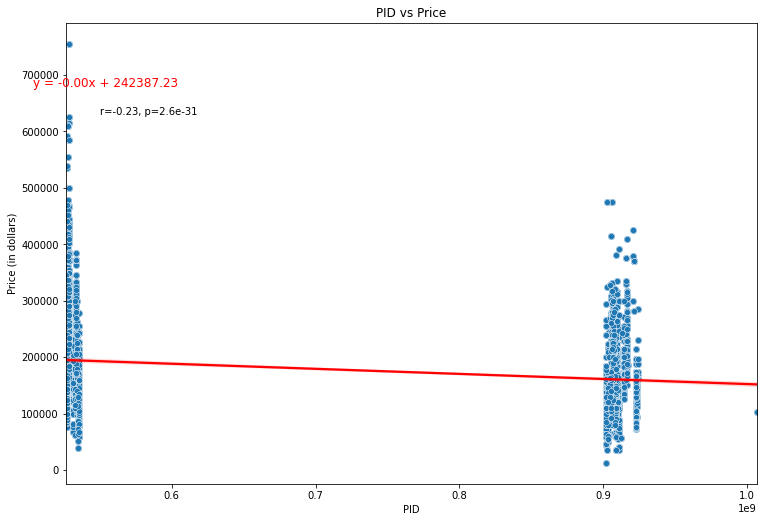

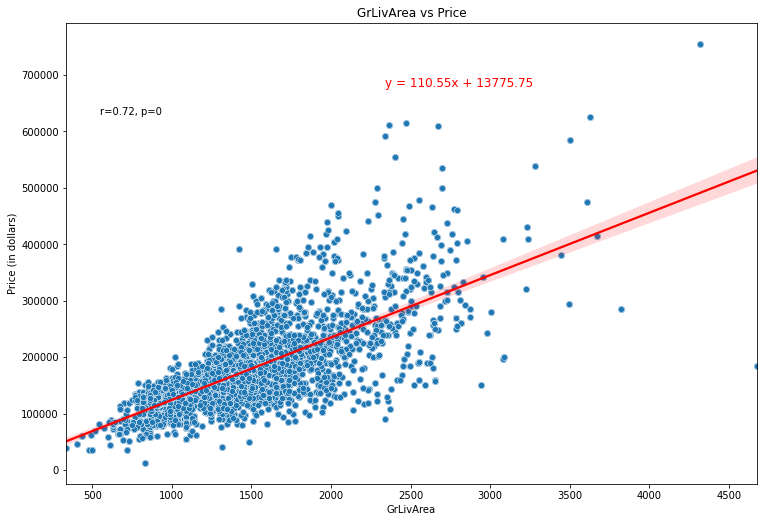

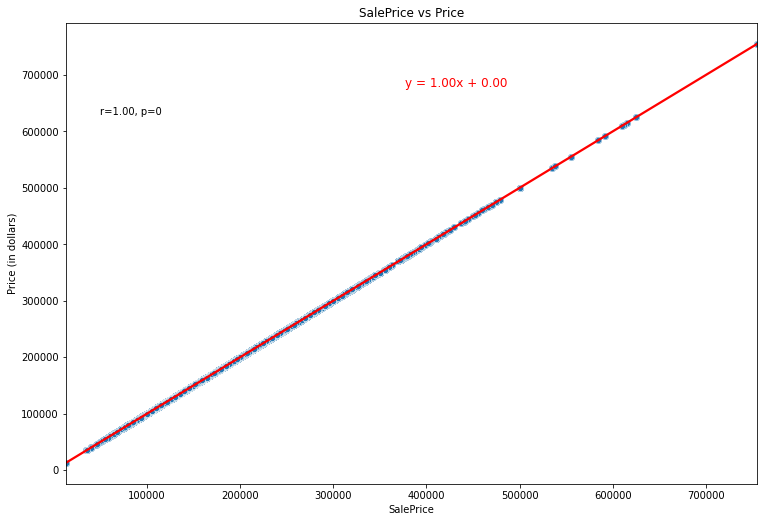

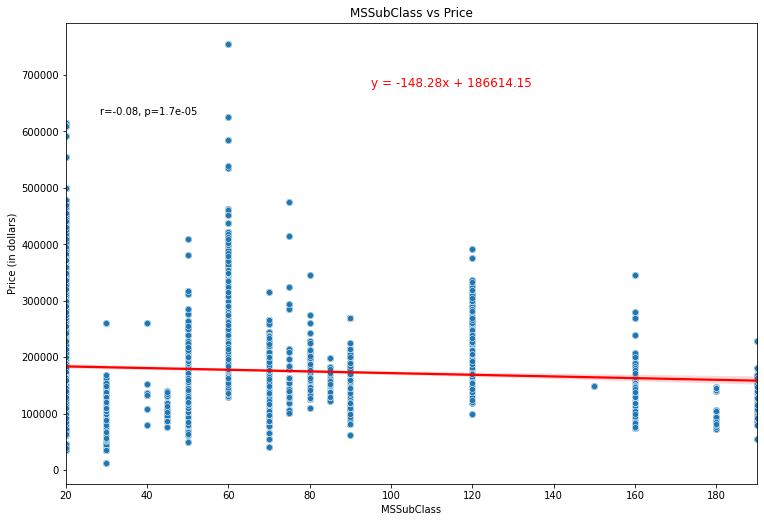

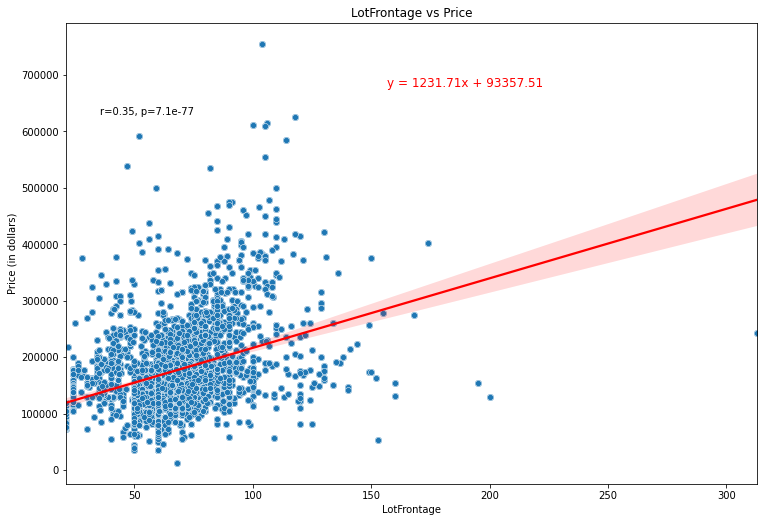

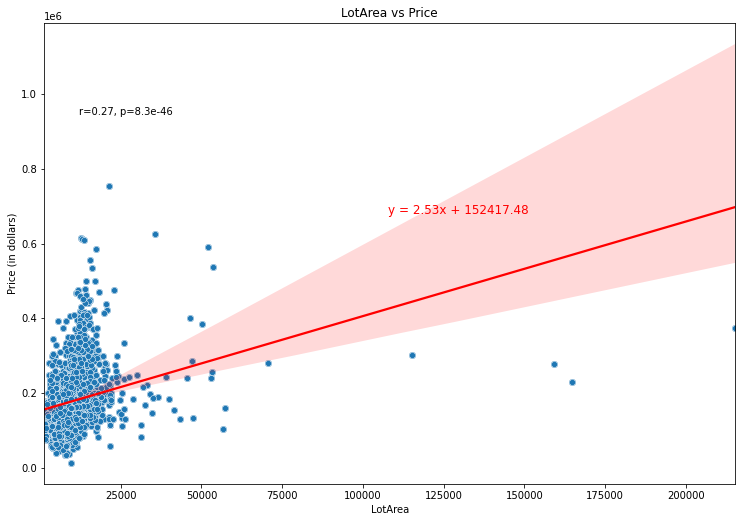

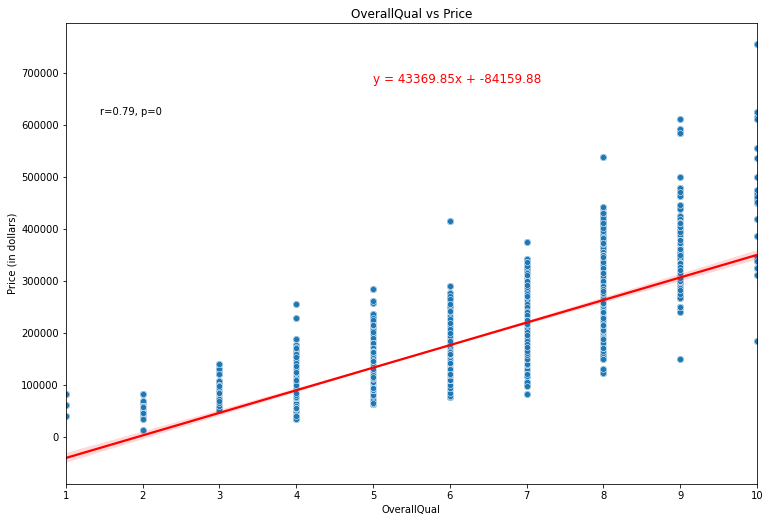

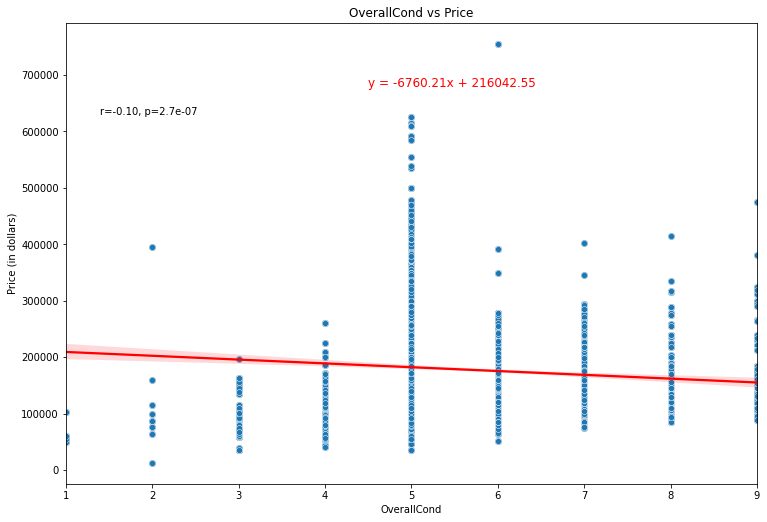

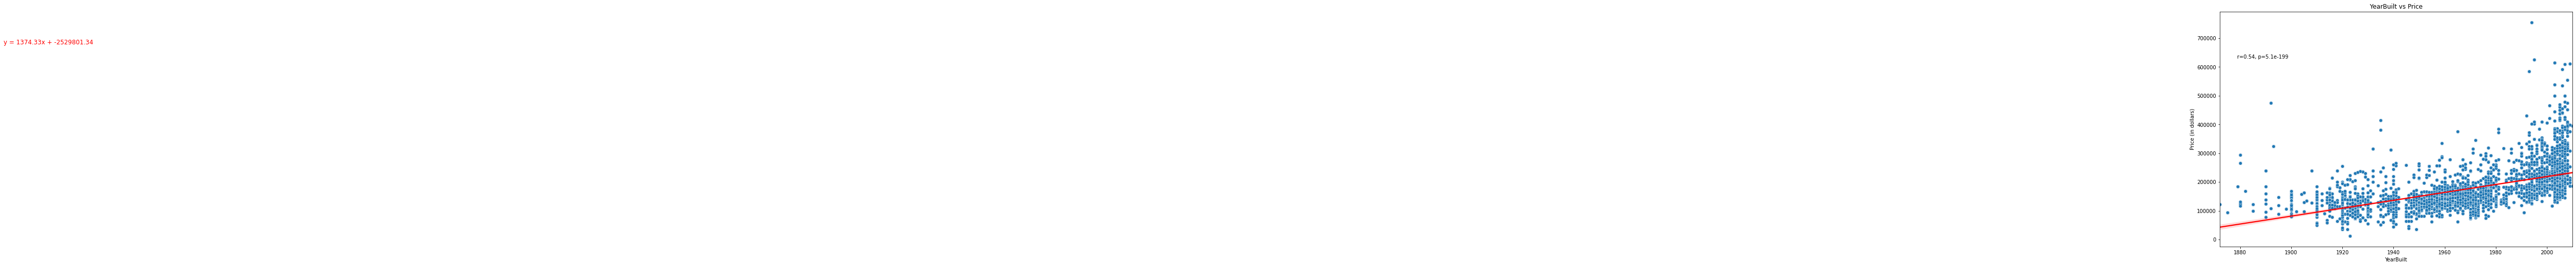

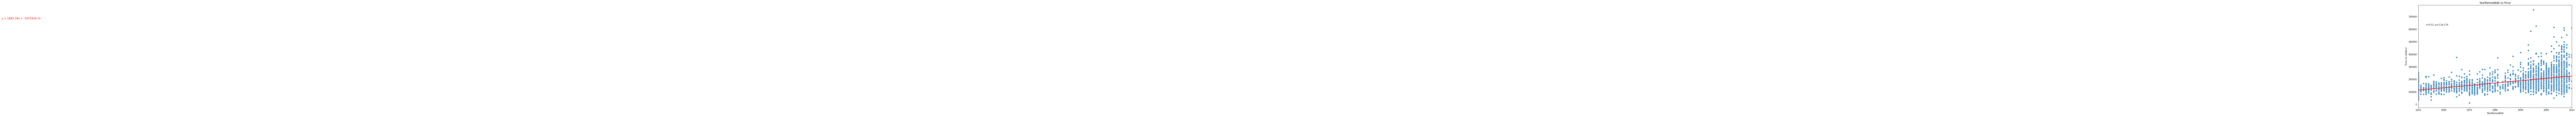

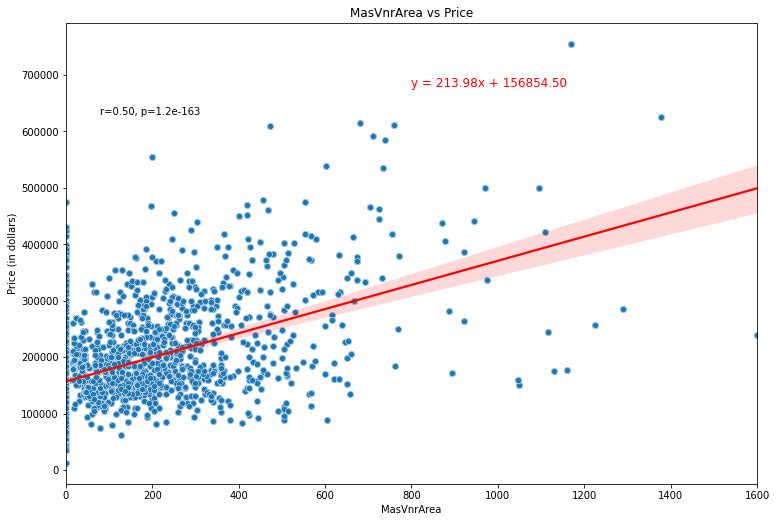

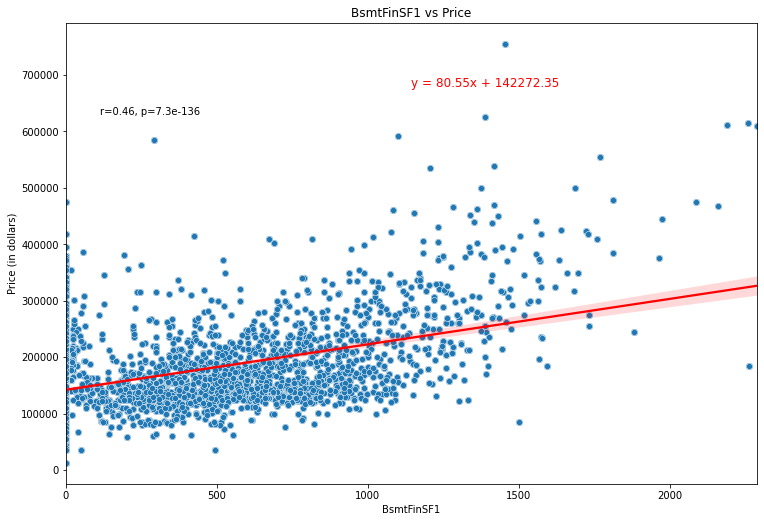

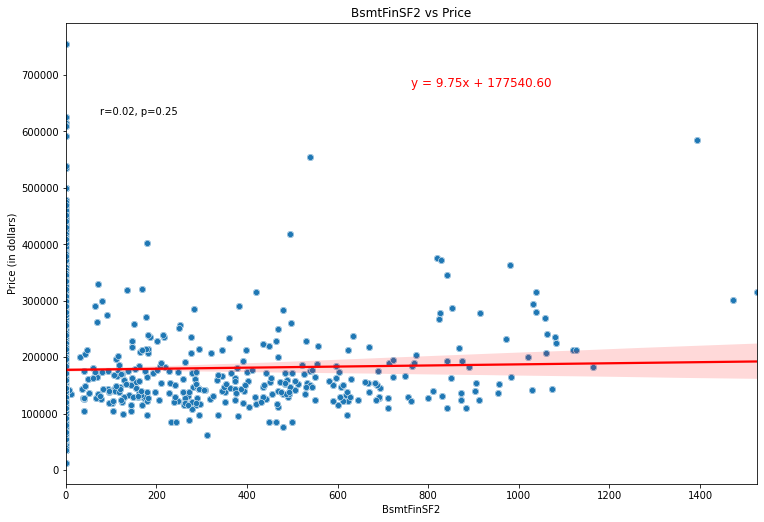

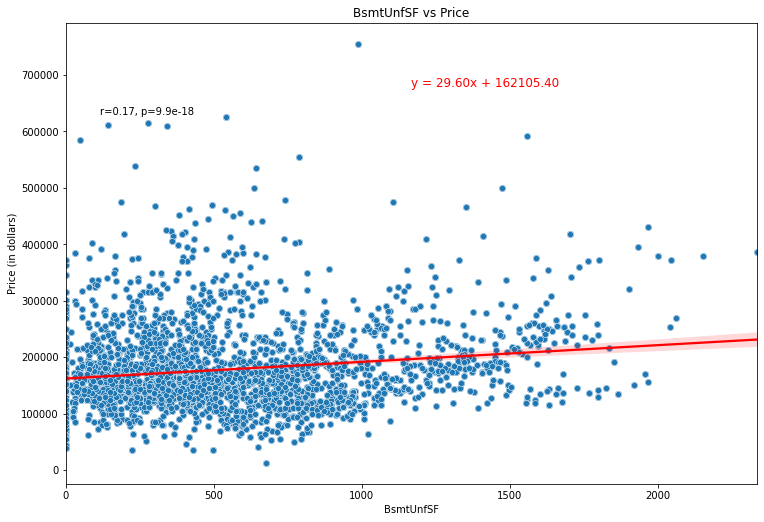

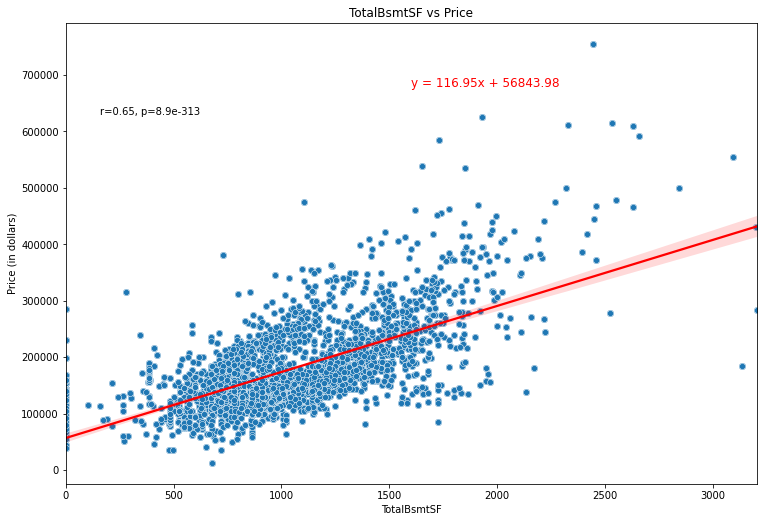

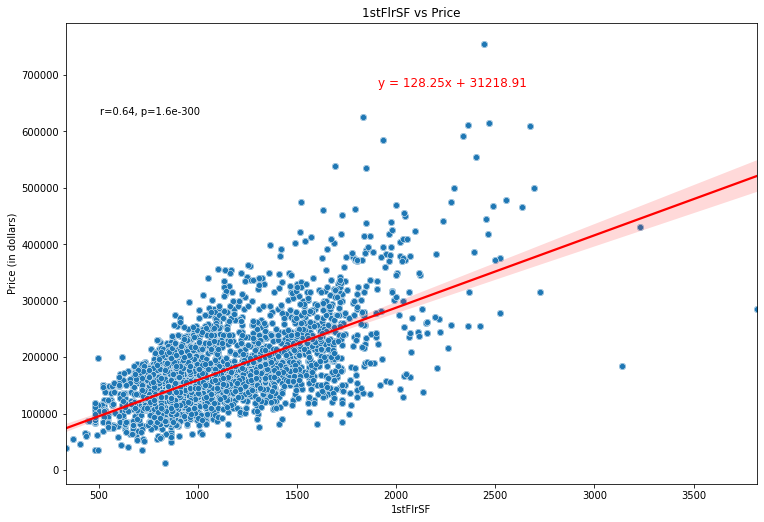

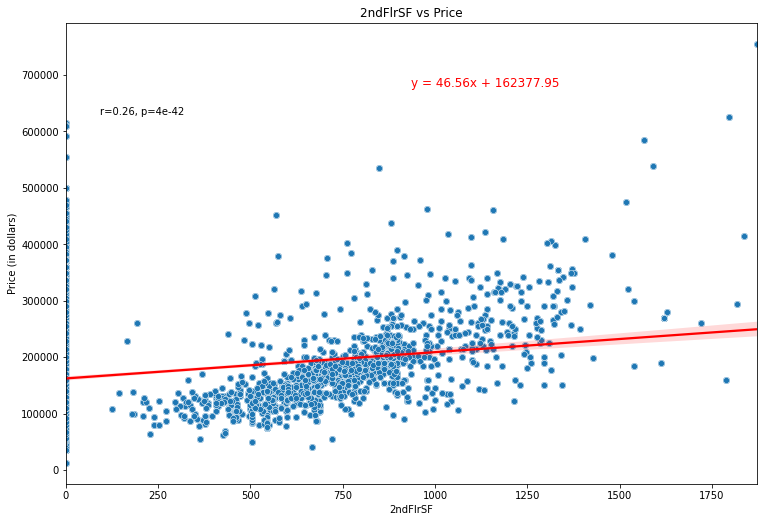

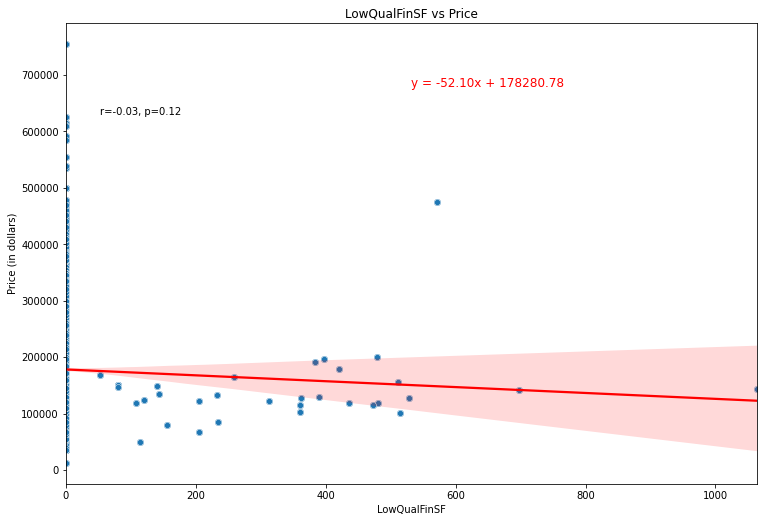

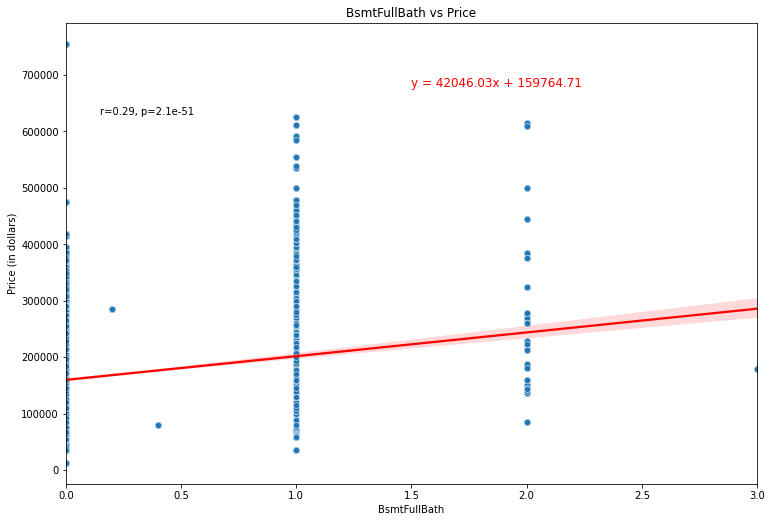

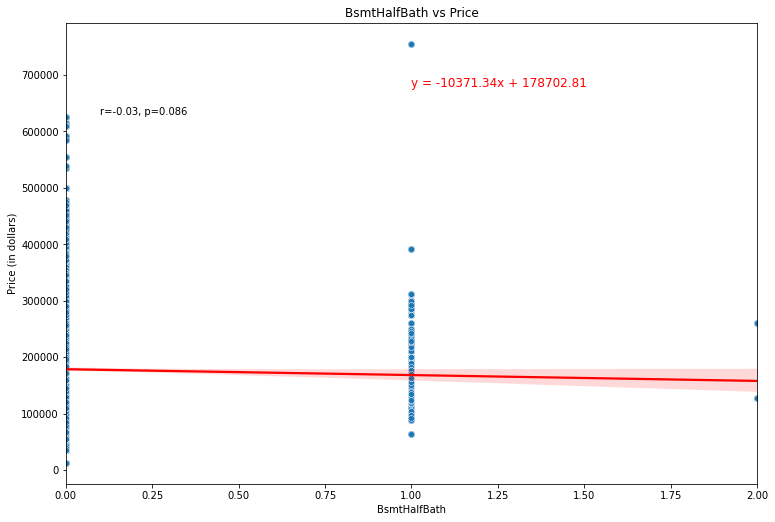

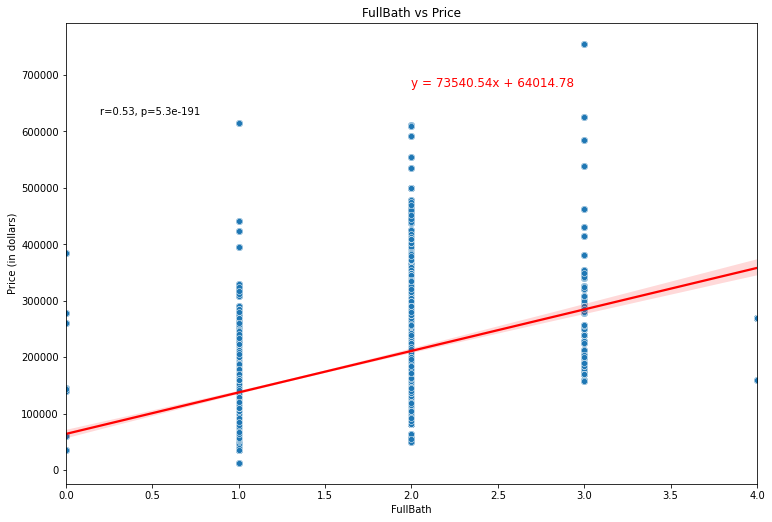

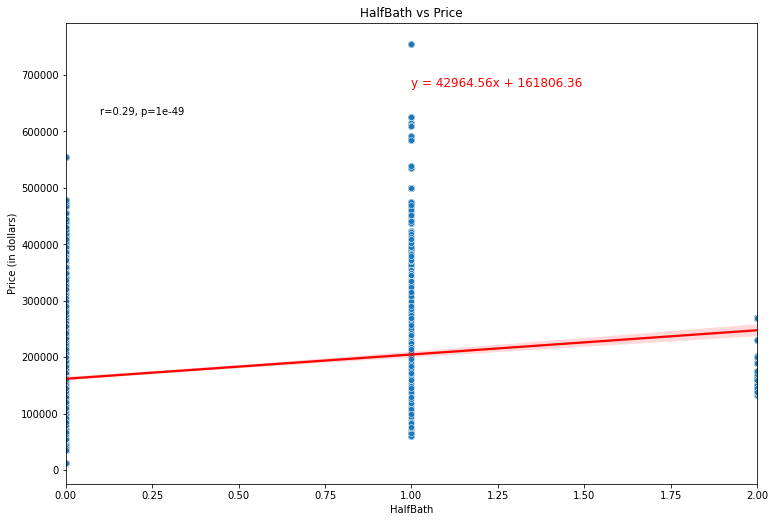

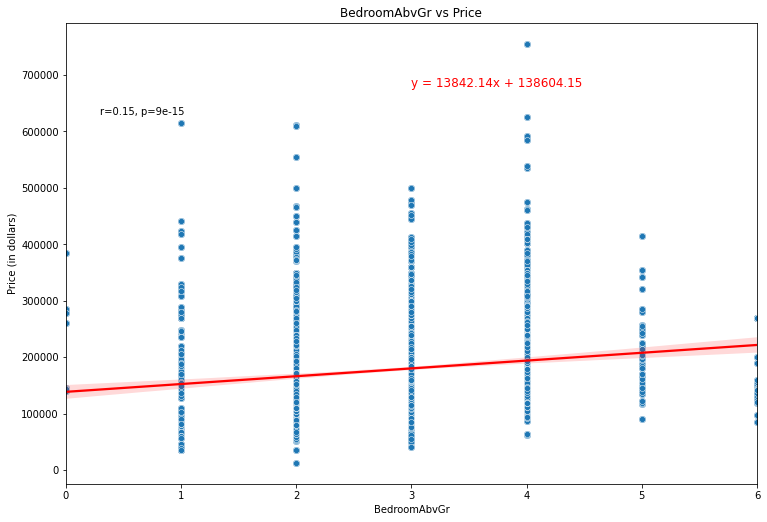

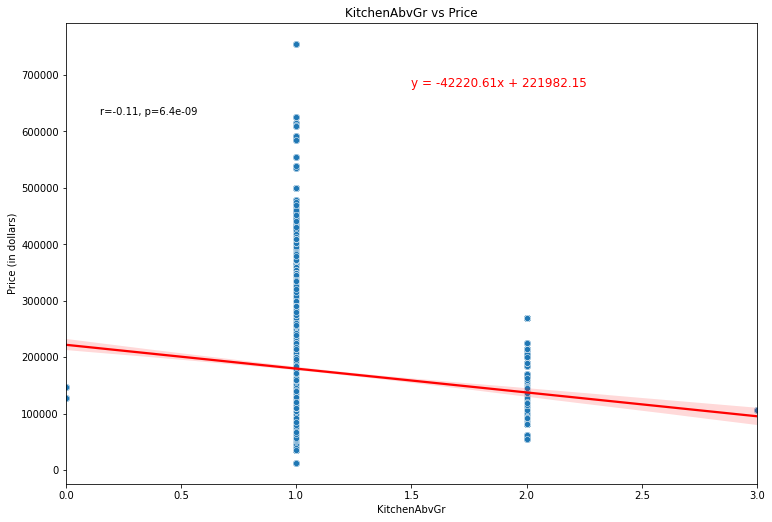

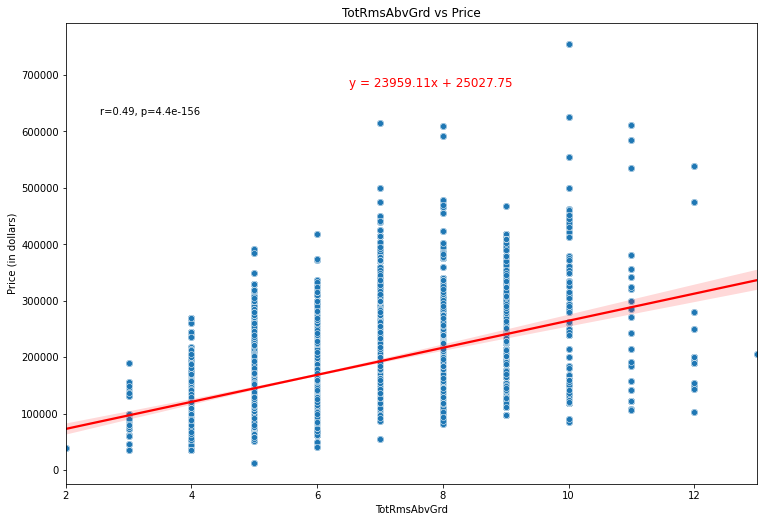

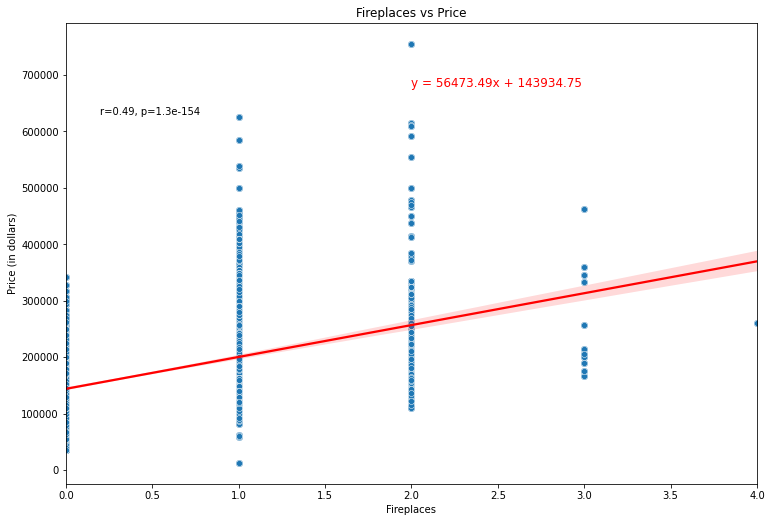

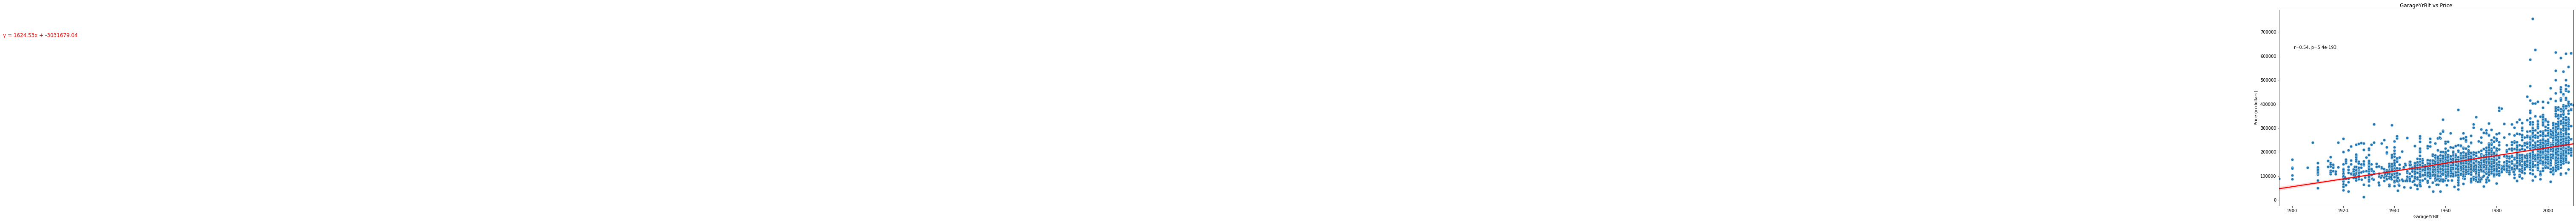

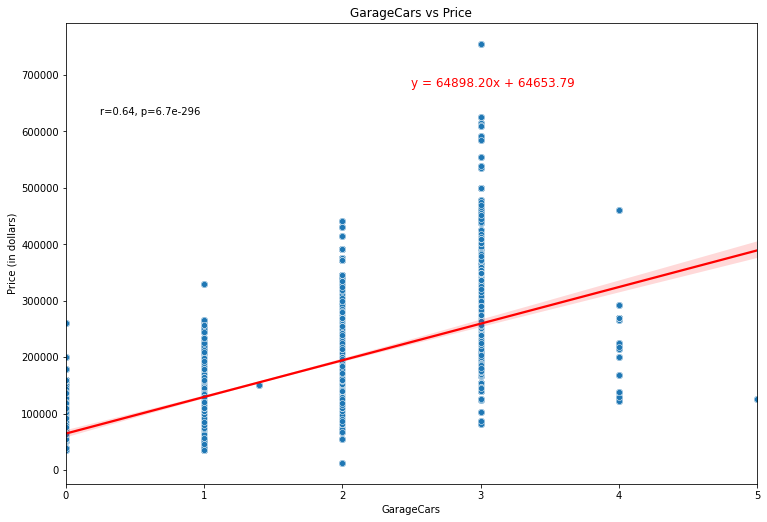

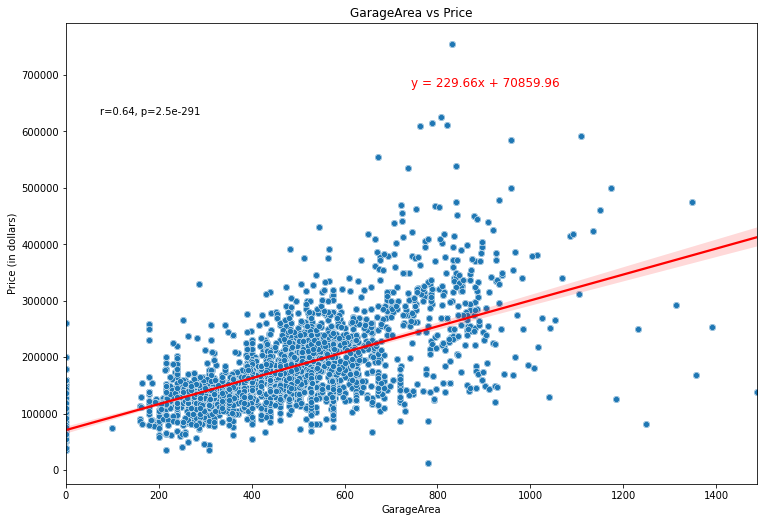

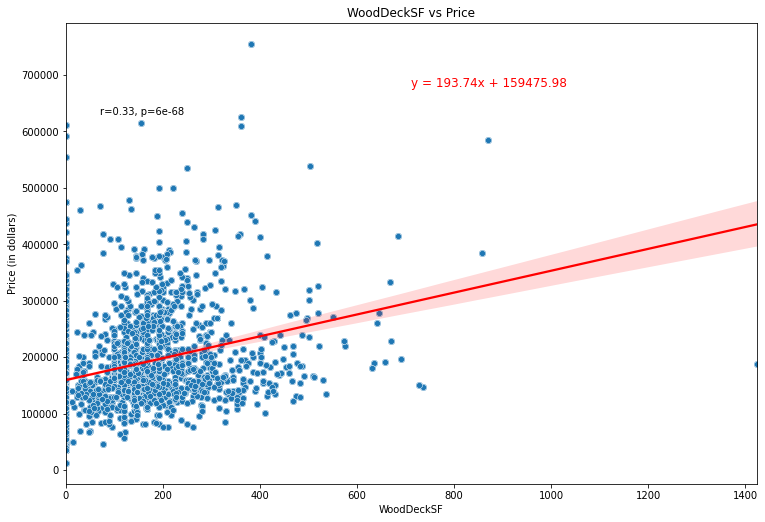

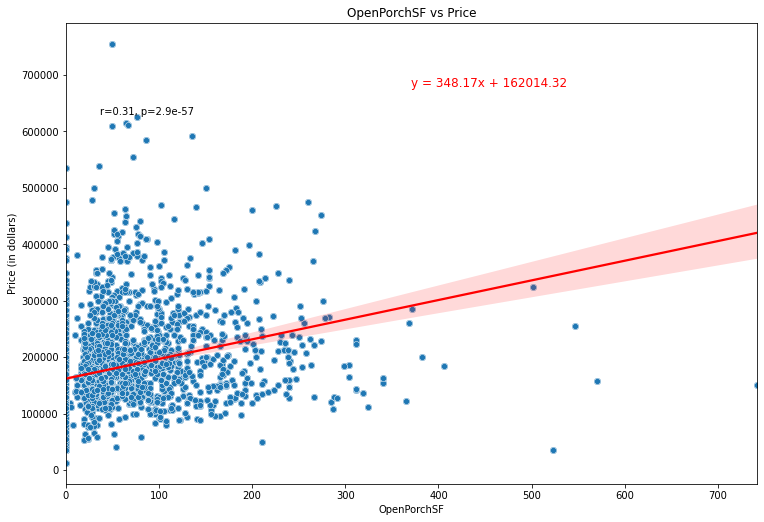

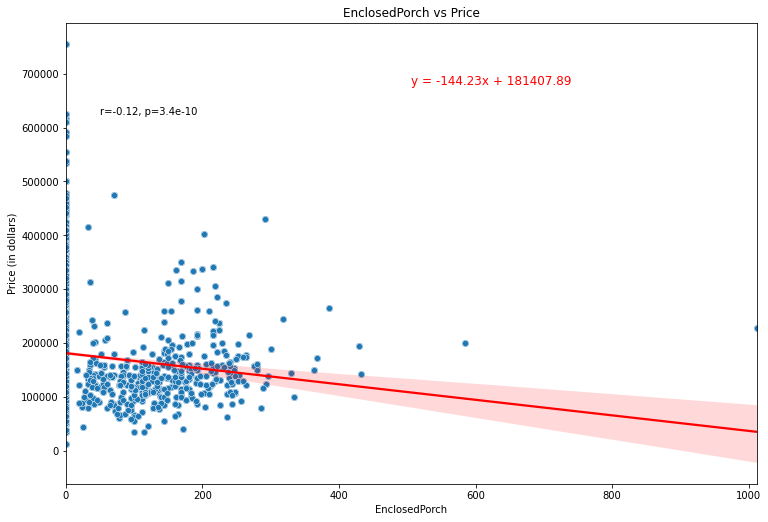

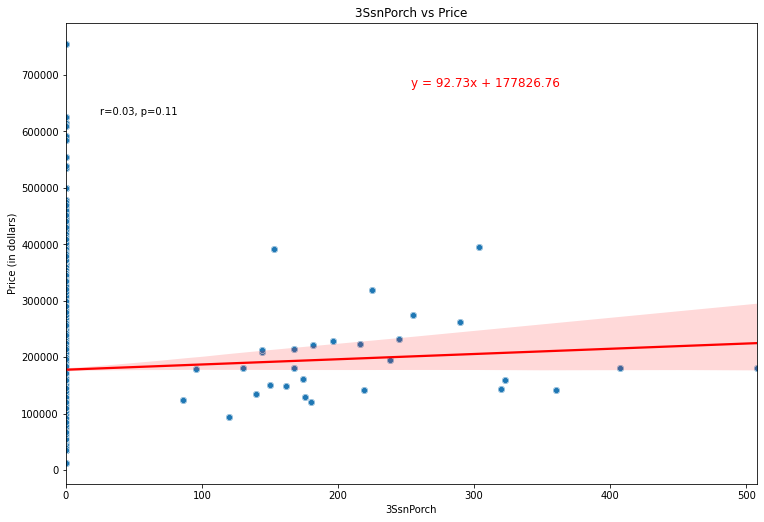

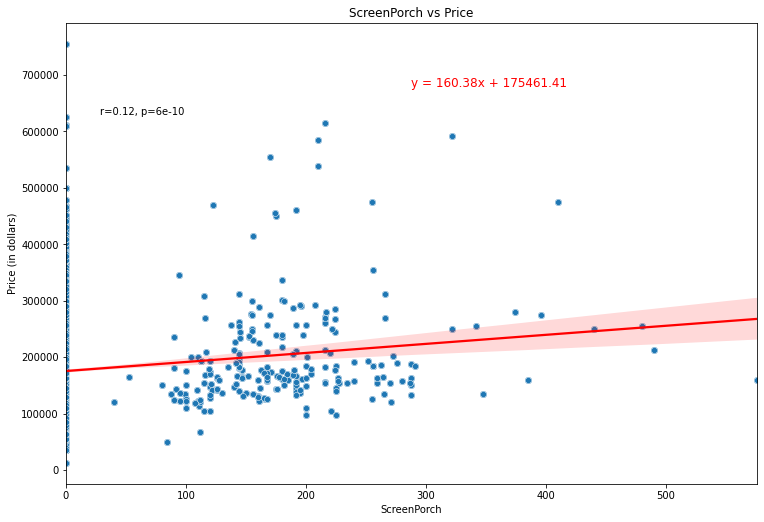

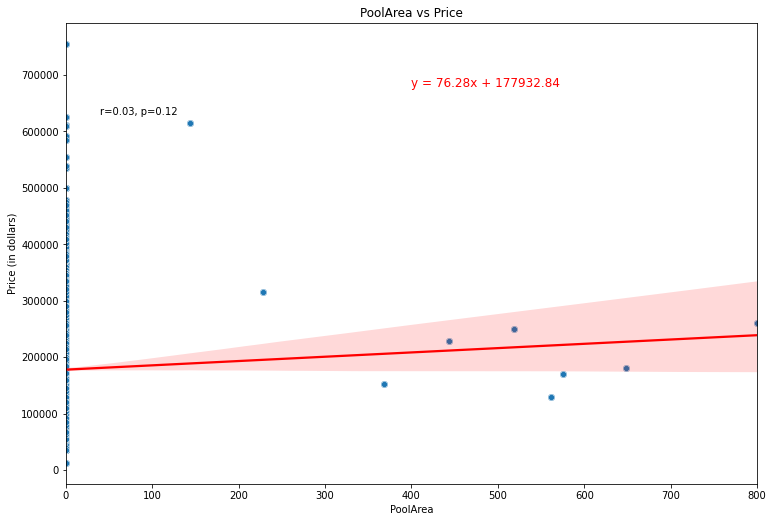

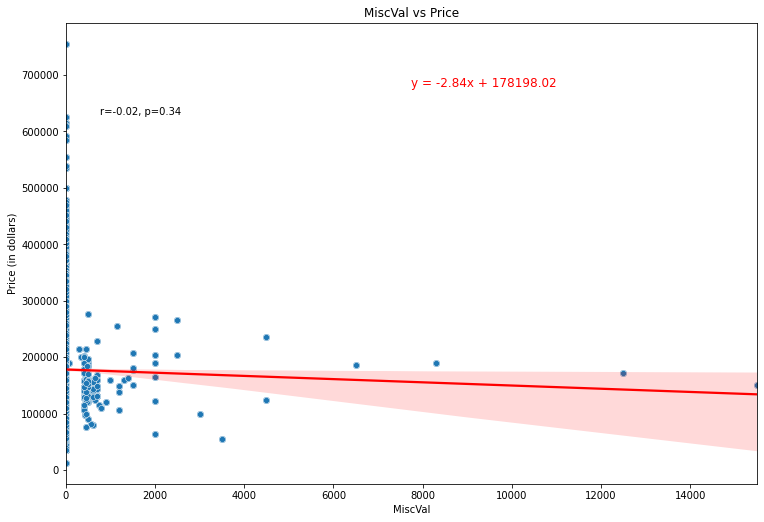

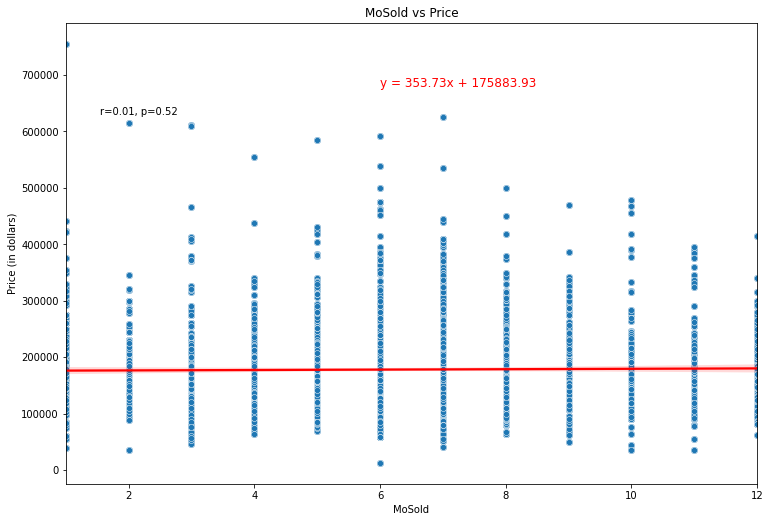

ValueError: Image size of 173695x522 pixels is too large. It must be less than 2^16 in each direction.

<Figure size 864x576 with 1 Axes>

In [8]:
#EDA - Use scatterplots: Scatterplots can be used to visualize the relationship between price and other 
  #  features such as size, number of bedrooms, and location. 
  #  This can help you identify homes that meet your criteria and are within your budget.

numerical_cols_list = numerical_cols.columns.tolist()

# Loop through each numerical column
for x in numerical_cols_list:
    try:
        # Calculate the linear regression statistics
        slope, intercept, r_value, p_value, std_err = stats.linregress(numerical_cols[x],numerical_cols['SalePrice'])
        
        # Plot the data
        fig, ax = plt.subplots(figsize=(12,8))
        sns.scatterplot(x=x, y='SalePrice',
                           data=numerical_cols, ax=ax)
        def annotate(data, **kws):
            r, p = sp.stats.pearsonr(numerical_cols[x],numerical_cols['SalePrice'])
            ax = plt.gca()
            ax.text(.05, .8, 'r={:.2f}, p={:.2g}'.format(r, p),
            transform=ax.transAxes)
        annotate(None)
        
        # Plot the regression line
        ax = sns.regplot(x=x, y="SalePrice", data=numerical_cols, scatter_kws={"zorder":-1},
        line_kws={'color': 'red'})

        # Add the regression line label
        plt.text(x=numerical_cols[x].max()*0.5, y=numerical_cols['SalePrice'].max()*0.9,
                 s='y = {:.2f}x + {:.2f}'.format(slope, intercept),
                 color='red', fontsize=12)

        # Add the legend
        plt.title(str(x)+' vs Price')
        plt.xlabel(x)
        plt.ylabel("Price (in dollars)")

        # Adjust the plot margins
        plt.subplots_adjust(left=0.1, right=0.9, bottom=0.1, top=0.9)

        plt.show()
        
    except Exception as e:
        print('Skipping feature', x, 'due to error:', e)
        
#I can make bins for the YearSold v Price

In [9]:
numeric_features=numerical_cols
vif_data = pd.DataFrame()
vif_data["feature"] = numeric_features.columns
vif_data["VIF"] = [variance_inflation_factor(numeric_features.values, i) for i in range(len(numeric_features.columns))]
vif_data = vif_data.drop(vif_data[vif_data['feature']=='SalePrice'].index)

# Set option to display VIF values without exponential notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print the results
print(vif_data)

          feature      VIF
0             PID    18.84
1       GrLivArea      inf
3      MSSubClass     4.93
4     LotFrontage    20.41
5         LotArea     3.37
6     OverallQual    73.35
7     OverallCond    41.91
8       YearBuilt 24158.24
9    YearRemodAdd 21730.46
10     MasVnrArea     1.90
11     BsmtFinSF1      inf
12     BsmtFinSF2      inf
13      BsmtUnfSF      inf
14    TotalBsmtSF      inf
15       1stFlrSF      inf
16       2ndFlrSF      inf
17   LowQualFinSF      inf
18   BsmtFullBath     3.62
19   BsmtHalfBath     1.25
20       FullBath    25.26
21       HalfBath     3.51
22   BedroomAbvGr    33.22
23   KitchenAbvGr    43.19
24   TotRmsAbvGrd    82.72
25     Fireplaces     2.96
26    GarageYrBlt 28919.25
27     GarageCars    37.61
28     GarageArea    34.63
29     WoodDeckSF     1.92
30    OpenPorchSF     1.78
31  EnclosedPorch     1.38
32      3SsnPorch     1.03
33    ScreenPorch     1.19
34       PoolArea     1.06
35        MiscVal     1.03
36         MoSold     6.45
3

In [10]:
# 1. Evaluate VIF and make a call whether to drop.
# 2. From scatterplot above, if there isn't a strong relationship between feature and target variable, drop feature. 
numerical_cols = numerical_cols.drop(["PID","MSSubClass", "LotArea", "LotFrontage","OverallCond", "LowQualFinSF", "GarageCars","WoodDeckSF", "OpenPorchSF", 
                                      "EnclosedPorch","ScreenPorch","3SsnPorch", "MiscVal", "MoSold",
                                     "MasVnrArea"], axis=1)

In [11]:
numerical_cols.columns

Index(['GrLivArea', 'SalePrice', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageArea', 'PoolArea', 'YrSold'],
      dtype='object')

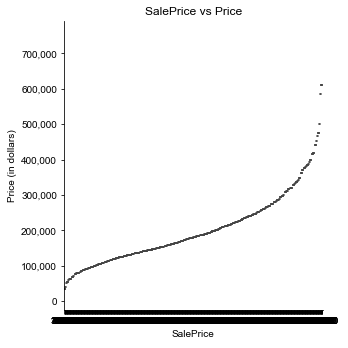

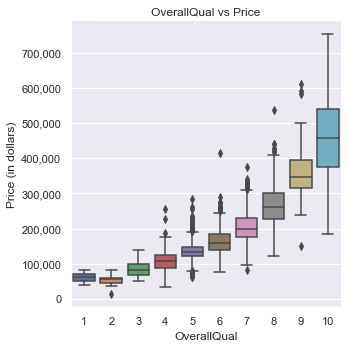

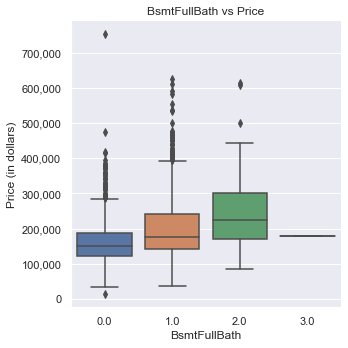

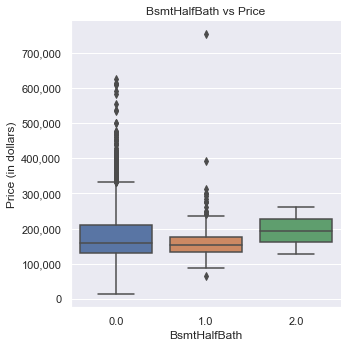

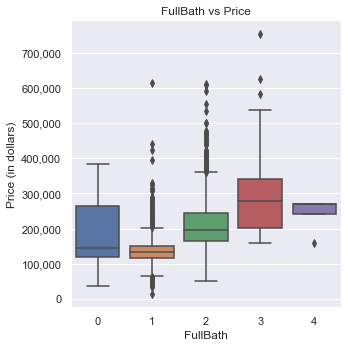

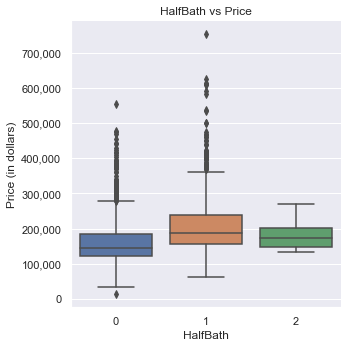

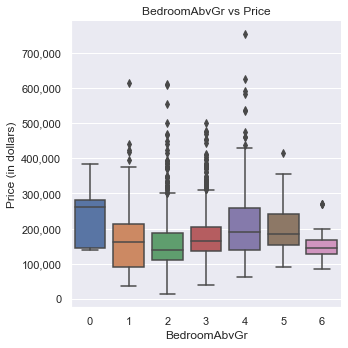

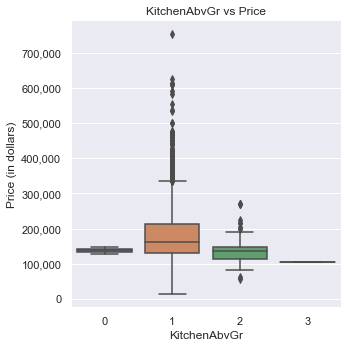

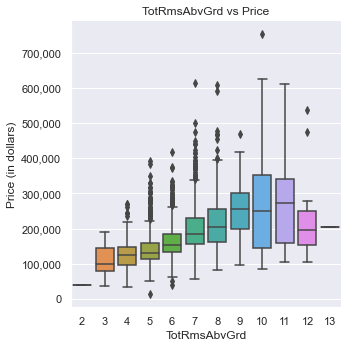

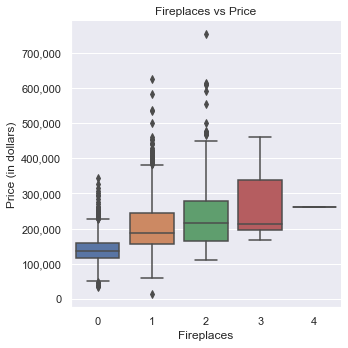

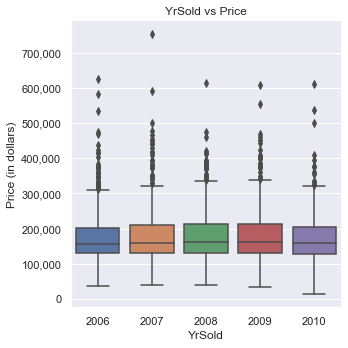

In [12]:
#EDA - Boxplot- Numerical Variables
numerical_cols_list = numerical_cols.columns.tolist()


cols_to_remove = ['GrLivArea', 'LotFrontage','YearBuilt','YearRemodAdd','MasVnrArea',
                  'BsmtFinSF1','BsmtFinSF2','BsmtUnfSF','TotalBsmtSF','1stFlrSF','2ndFlrSF',
                  'LotFrontage', 'GarageCars',
                 'GarageYrBlt','PoolArea','GarageArea']
for col in cols_to_remove:
    if col in numerical_cols_list:
        numerical_cols_list.remove(col)
        
#box and whiskerplot
for x in numerical_cols_list:
    fg=sns.catplot(data=ames,x=x,y='SalePrice',kind='box')
    sns.set()
    for ax in fg.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")

    plt.tight_layout()
#So that axis show
    plt.show()

In [13]:
#Based on boxplot above, drop YrSold,BedroomAbvGrade

numerical_cols = numerical_cols.drop(["YrSold","BedroomAbvGr"], axis=1)

numerical_cols

GrLivArea  SalePrice  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0        856.00  126000.00         6.00    1939.00       1950.00      238.00   
1       1049.00  139500.00         5.00    1984.00       1984.00      552.00   
2       1001.00  124900.00         5.00    1930.00       2007.00      737.00   
3       1039.00  114000.00         4.00    1900.00       2003.00        0.00   
4       1665.00  227000.00         8.00    2001.00       2001.00      643.00   
...         ...        ...          ...        ...           ...         ...   
2575     952.00  121000.00         6.00    1916.00       1950.00        0.00   
2576    1733.00  139600.00         3.00    1955.00       1955.00        0.00   
2577    2002.00  145000.00         5.00    1949.00       1950.00      284.00   
2578    1842.00  217500.00         7.00    2000.00       2000.00      841.00   
2579    1911.00  215000.00         8.00    1993.00       1994.00      380.00   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  BsmtFullBath  \
0           0.00     618.00       856.00    856.00      0.00          1.00   
1         393.00     104.00      1049.00   1049.00      0.00          1.00   
2           0.00     100.00       837.00   1001.00      0.00          0.00   
3           0.00     405.00       405.00    717.00    322.00          0.00   
4           0.00     167.00       810.00    810.00    855.00          1.00   
...          ...        ...          ...       ...       ...           ...   
2575        0.00     952.00       952.00    952.00      0.00          0.00   
2576        0.00       0.00         0.00   1733.00      0.00          0.00   
2577        0.00     717.00      1001.00   1001.00   1001.00          0.00   
2578        0.00     144.00       985.00    985.00    857.00          1.00   
2579        0.00     397.00       777.00   1065.00    846.00          0.00   

      BsmtHalfBath  FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0             0.00      1.00      0.00          1.00          4.00   
1             0.00      2.00      0.00          1.00          5.00   
2             0.00      1.00      0.00          1.00          5.00   
3             0.00      1.00      0.00          1.00          6.00   
4             0.00      2.00      1.00          1.00          6.00   
...            ...       ...       ...           ...           ...   
2575          0.00      1.00      0.00          1.00          4.00   
2576          0.00      2.00      0.00          1.00          8.00   
2577          0.00      2.00      0.00          2.00          8.00   
2578          0.00      2.00      1.00          1.00          7.00   
2579          0.00      2.00      1.00          1.00          8.00   

      Fireplaces  GarageYrBlt  GarageArea  PoolArea  
0           1.00      1939.00      399.00      0.00  
1           0.00      1984.00      266.00      0.00  
2           0.00      1930.00      216.00      0.00  
3           0.00      1940.00      281.00      0.00  
4           0.00      2001.00      528.00      0.00  
...          ...          ...         ...       ...  
2575        1.00      1916.00      192.00      0.00  
2576        1.00      1955.00      452.00      0.00  
2577        0.00      1949.00      871.00      0.00  
2578        1.00      2000.00      486.00      0.00  
2579        1.00      1993.00      471.00      0.00  

[2580 rows x 21 columns]

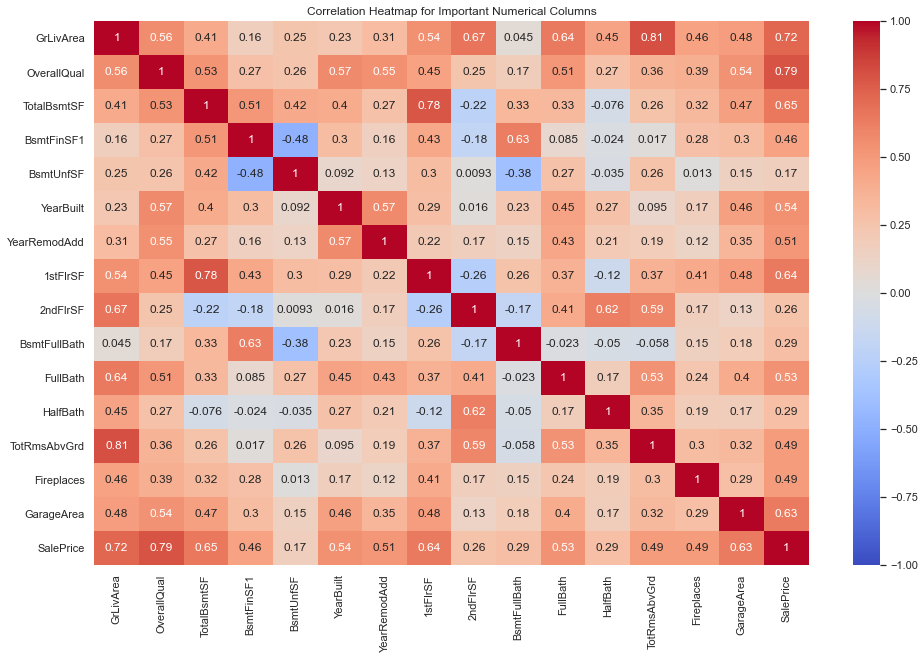

In [14]:
#EDA - Correlation analysis: Compute the correlation between each feature and the target variable, 
#Evaluate those features that are highly correlated with the target variable.

# Create correlation matrix for important numerical columns in ames
corr_matrix = ames.corr()

# Select columns of interest
cols_of_interest = ['GrLivArea', 'OverallQual','TotalBsmtSF', 'BsmtFinSF1','BsmtUnfSF','YearBuilt', 'YearRemodAdd', '1stFlrSF', '2ndFlrSF',
                    'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
                    'Fireplaces', 'GarageArea','SalePrice']

# Create a sub-correlation matrix for selected columns
sub_corr_matrix = corr_matrix.loc[cols_of_interest, cols_of_interest]

# Create heatmap
plt.figure(figsize=(16, 10))
sns.heatmap(sub_corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap for Important Numerical Columns')
plt.show()

In [15]:
numerical_cols

GrLivArea  SalePrice  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0        856.00  126000.00         6.00    1939.00       1950.00      238.00   
1       1049.00  139500.00         5.00    1984.00       1984.00      552.00   
2       1001.00  124900.00         5.00    1930.00       2007.00      737.00   
3       1039.00  114000.00         4.00    1900.00       2003.00        0.00   
4       1665.00  227000.00         8.00    2001.00       2001.00      643.00   
...         ...        ...          ...        ...           ...         ...   
2575     952.00  121000.00         6.00    1916.00       1950.00        0.00   
2576    1733.00  139600.00         3.00    1955.00       1955.00        0.00   
2577    2002.00  145000.00         5.00    1949.00       1950.00      284.00   
2578    1842.00  217500.00         7.00    2000.00       2000.00      841.00   
2579    1911.00  215000.00         8.00    1993.00       1994.00      380.00   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  BsmtFullBath  \
0           0.00     618.00       856.00    856.00      0.00          1.00   
1         393.00     104.00      1049.00   1049.00      0.00          1.00   
2           0.00     100.00       837.00   1001.00      0.00          0.00   
3           0.00     405.00       405.00    717.00    322.00          0.00   
4           0.00     167.00       810.00    810.00    855.00          1.00   
...          ...        ...          ...       ...       ...           ...   
2575        0.00     952.00       952.00    952.00      0.00          0.00   
2576        0.00       0.00         0.00   1733.00      0.00          0.00   
2577        0.00     717.00      1001.00   1001.00   1001.00          0.00   
2578        0.00     144.00       985.00    985.00    857.00          1.00   
2579        0.00     397.00       777.00   1065.00    846.00          0.00   

      BsmtHalfBath  FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0             0.00      1.00      0.00          1.00          4.00   
1             0.00      2.00      0.00          1.00          5.00   
2             0.00      1.00      0.00          1.00          5.00   
3             0.00      1.00      0.00          1.00          6.00   
4             0.00      2.00      1.00          1.00          6.00   
...            ...       ...       ...           ...           ...   
2575          0.00      1.00      0.00          1.00          4.00   
2576          0.00      2.00      0.00          1.00          8.00   
2577          0.00      2.00      0.00          2.00          8.00   
2578          0.00      2.00      1.00          1.00          7.00   
2579          0.00      2.00      1.00          1.00          8.00   

      Fireplaces  GarageYrBlt  GarageArea  PoolArea  
0           1.00      1939.00      399.00      0.00  
1           0.00      1984.00      266.00      0.00  
2           0.00      1930.00      216.00      0.00  
3           0.00      1940.00      281.00      0.00  
4           0.00      2001.00      528.00      0.00  
...          ...          ...         ...       ...  
2575        1.00      1916.00      192.00      0.00  
2576        1.00      1955.00      452.00      0.00  
2577        0.00      1949.00      871.00      0.00  
2578        1.00      2000.00      486.00      0.00  
2579        1.00      1993.00      471.00      0.00  

[2580 rows x 21 columns]

In [16]:
#Research suggests square footage, bathrooms, year built, garages, remodeling property are important predictors of SalePrice. 
#Will keep.

vif_data = pd.DataFrame()
vif_data["feature"] = numerical_cols.columns
vif_data["VIF"] = [variance_inflation_factor(numerical_cols.values, i) for i in range(len(numerical_cols.columns))]
vif_data = vif_data.drop(vif_data[vif_data['feature']=='SalePrice'].index)

# Set option to display VIF values without exponential notation
pd.set_option('display.float_format', lambda x: '%.2f' % x)

# Print the results
print(vif_data)

         feature      VIF
0      GrLivArea  1325.14
2    OverallQual    64.49
3      YearBuilt 19027.85
4   YearRemodAdd 11800.16
5     BsmtFinSF1      inf
6     BsmtFinSF2      inf
7      BsmtUnfSF      inf
8    TotalBsmtSF      inf
9       1stFlrSF   810.96
10      2ndFlrSF   158.64
11  BsmtFullBath     3.49
12  BsmtHalfBath     1.22
13      FullBath    19.68
14      HalfBath     3.16
15  KitchenAbvGr    37.44
16  TotRmsAbvGrd    62.44
17    Fireplaces     2.75
18   GarageYrBlt 25318.27
19    GarageArea    12.02
20      PoolArea     1.03


In [17]:
numerical_cols

GrLivArea  SalePrice  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0        856.00  126000.00         6.00    1939.00       1950.00      238.00   
1       1049.00  139500.00         5.00    1984.00       1984.00      552.00   
2       1001.00  124900.00         5.00    1930.00       2007.00      737.00   
3       1039.00  114000.00         4.00    1900.00       2003.00        0.00   
4       1665.00  227000.00         8.00    2001.00       2001.00      643.00   
...         ...        ...          ...        ...           ...         ...   
2575     952.00  121000.00         6.00    1916.00       1950.00        0.00   
2576    1733.00  139600.00         3.00    1955.00       1955.00        0.00   
2577    2002.00  145000.00         5.00    1949.00       1950.00      284.00   
2578    1842.00  217500.00         7.00    2000.00       2000.00      841.00   
2579    1911.00  215000.00         8.00    1993.00       1994.00      380.00   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  BsmtFullBath  \
0           0.00     618.00       856.00    856.00      0.00          1.00   
1         393.00     104.00      1049.00   1049.00      0.00          1.00   
2           0.00     100.00       837.00   1001.00      0.00          0.00   
3           0.00     405.00       405.00    717.00    322.00          0.00   
4           0.00     167.00       810.00    810.00    855.00          1.00   
...          ...        ...          ...       ...       ...           ...   
2575        0.00     952.00       952.00    952.00      0.00          0.00   
2576        0.00       0.00         0.00   1733.00      0.00          0.00   
2577        0.00     717.00      1001.00   1001.00   1001.00          0.00   
2578        0.00     144.00       985.00    985.00    857.00          1.00   
2579        0.00     397.00       777.00   1065.00    846.00          0.00   

      BsmtHalfBath  FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0             0.00      1.00      0.00          1.00          4.00   
1             0.00      2.00      0.00          1.00          5.00   
2             0.00      1.00      0.00          1.00          5.00   
3             0.00      1.00      0.00          1.00          6.00   
4             0.00      2.00      1.00          1.00          6.00   
...            ...       ...       ...           ...           ...   
2575          0.00      1.00      0.00          1.00          4.00   
2576          0.00      2.00      0.00          1.00          8.00   
2577          0.00      2.00      0.00          2.00          8.00   
2578          0.00      2.00      1.00          1.00          7.00   
2579          0.00      2.00      1.00          1.00          8.00   

      Fireplaces  GarageYrBlt  GarageArea  PoolArea  
0           1.00      1939.00      399.00      0.00  
1           0.00      1984.00      266.00      0.00  
2           0.00      1930.00      216.00      0.00  
3           0.00      1940.00      281.00      0.00  
4           0.00      2001.00      528.00      0.00  
...          ...          ...         ...       ...  
2575        1.00      1916.00      192.00      0.00  
2576        1.00      1955.00      452.00      0.00  
2577        0.00      1949.00      871.00      0.00  
2578        1.00      2000.00      486.00      0.00  
2579        1.00      1993.00      471.00      0.00  

[2580 rows x 21 columns]

In [18]:
#are there any nulls in categorical columns?
# Select only the categorical columns
cat_cols = ames.select_dtypes(include='object').columns.tolist()

# Print the resulting dataframe
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [19]:
null_cat_cols_sum = ames.select_dtypes(include=['object']).isnull().sum()
null_cat_cols_sum = null_cat_cols_sum[null_cat_cols_sum > 0]
print(null_cat_cols_sum)

Alley           2412
MasVnrType        14
BsmtQual          69
BsmtCond          69
BsmtExposure      71
BsmtFinType1      69
BsmtFinType2      70
Electrical         1
FireplaceQu     1241
GarageType       127
GarageFinish     129
GarageQual       129
GarageCond       129
PoolQC          2571
Fence           2055
MiscFeature     2483
dtype: int64


In [20]:
#Populate categorical null columns with the word "Unknown"
categorical_cols = ames.select_dtypes(include=['object']).columns.tolist()
categorical_data = ames[categorical_cols]
categorical_data_copy = categorical_data.copy()
categorical_data_copy.fillna("Unknown", inplace=True)
categorical_data_copy

MSZoning Street    Alley LotShape LandContour Utilities LotConfig  \
1         RL   Pave  Unknown      Reg         Lvl    AllPub    Corner   
2         RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
3    C (all)   Pave  Unknown      Reg         Lvl    AllPub    Inside   
4         RL   Pave  Unknown      Reg         Lvl    AllPub    Corner   
5         RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
..       ...    ...      ...      ...         ...       ...       ...   
759       RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
760       RL   Pave  Unknown      IR1         Lvl    AllPub   CulDSac   
761       RH   Pave  Unknown      Reg         HLS    AllPub    Inside   
762       RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
763       RL   Pave  Unknown      IR1         Lvl    AllPub    Inside   

    LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
1         Gtl        SWISU       Norm       Norm     1Fam     1Story   
2         Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
3         Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
4         Gtl      OldTown       Norm       Norm     1Fam     2Story   
5         Gtl       NWAmes       Norm       Norm     1Fam     2Story   
..        ...          ...        ...        ...      ...        ...   
759       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
760       Gtl      Edwards       Norm       Norm     1Fam     1Story   
761       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
762       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
763       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

    RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1       Gable  CompShg     Wd Sdng     Wd Sdng       None        TA        TA   
2       Gable  CompShg     HdBoard     HdBoard    BrkFace        Gd        TA   
3         Hip  CompShg     MetalSd     MetalSd       None        Gd        TA   
4       Gable  CompShg     MetalSd     MetalSd       None        Gd        Gd   
5       Gable  CompShg     VinylSd     VinylSd       None        Gd        TA   
..        ...      ...         ...         ...        ...       ...       ...   
759     Gable  CompShg     Wd Sdng     Wd Sdng       None        TA        TA   
760       Hip  CompShg     BrkFace     Wd Sdng       None        TA        TA   
761     Gable  CompShg     MetalSd     MetalSd       None        TA        TA   
762     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
763     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   

    Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
1       CBlock       TA       TA           No          Rec          Unf   
2       CBlock       Gd       TA           Mn          GLQ          ALQ   
3       BrkTil       TA       TA           No          ALQ          Unf   
4       BrkTil       Fa       TA           No          Unf          Unf   
5        PConc       Gd       TA           No          GLQ          Unf   
..         ...      ...      ...          ...          ...          ...   
759     BrkTil       TA       TA           No          Unf          Unf   
760       Slab  Unknown  Unknown      Unknown      Unknown      Unknown   
761     CBlock       TA       TA           No          BLQ          Unf   
762      PConc       Gd       TA           No          GLQ          Unf   
763      PConc       Gd       TA           No          GLQ          Unf   

    Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
1      GasA        TA          Y      SBrkr          TA        Typ   
2      GasA        TA          Y      SBrkr          Gd        Typ   
3      GasA        Ex          Y      SBrkr          Gd        Typ   
4      GasA        Gd          Y      SBrkr          TA        Typ   
5      GasA        Ex          Y      

In [21]:
# Select only the categorical columns
ames_cat = categorical_data_copy.select_dtypes(include=['object'])

# Loop through each column and print its value counts
for col in ames_cat.columns:
    print(f"{col}:")
    print(ames_cat[col].value_counts())
    print("\n")

MSZoning:
RL         2008
RM          418
FV          113
RH           21
C (all)      17
I (all)       2
A (agr)       1
Name: MSZoning, dtype: int64


Street:
Pave    2570
Grvl      10
Name: Street, dtype: int64


Alley:
Unknown    2412
Grvl        105
Pave         63
Name: Alley, dtype: int64


LotShape:
Reg    1641
IR1     855
IR2      71
IR3      13
Name: LotShape, dtype: int64


LandContour:
Lvl    2337
HLS      96
Bnk      95
Low      52
Name: LandContour, dtype: int64


Utilities:
AllPub    2578
NoSewr       2
Name: Utilities, dtype: int64


LotConfig:
Inside     1886
Corner      439
CulDSac     164
FR2          78
FR3          13
Name: LotConfig, dtype: int64


LandSlope:
Gtl    2458
Mod     109
Sev      13
Name: LandSlope, dtype: int64


Neighborhood:
NAmes      410
CollgCr    236
OldTown    213
Edwards    165
Somerst    143
Gilbert    143
Sawyer     139
NWAmes     123
NridgHt    121
SawyerW    113
Mitchel    104
BrkSide    103
Crawfor     93
IDOTRR      76
NoRidge     67
Tim

In [22]:
ames_cat

MSZoning Street    Alley LotShape LandContour Utilities LotConfig  \
1         RL   Pave  Unknown      Reg         Lvl    AllPub    Corner   
2         RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
3    C (all)   Pave  Unknown      Reg         Lvl    AllPub    Inside   
4         RL   Pave  Unknown      Reg         Lvl    AllPub    Corner   
5         RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
..       ...    ...      ...      ...         ...       ...       ...   
759       RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
760       RL   Pave  Unknown      IR1         Lvl    AllPub   CulDSac   
761       RH   Pave  Unknown      Reg         HLS    AllPub    Inside   
762       RL   Pave  Unknown      Reg         Lvl    AllPub    Inside   
763       RL   Pave  Unknown      IR1         Lvl    AllPub    Inside   

    LandSlope Neighborhood Condition1 Condition2 BldgType HouseStyle  \
1         Gtl        SWISU       Norm       Norm     1Fam     1Story   
2         Gtl      Edwards       Norm       Norm   TwnhsE     1Story   
3         Gtl       IDOTRR       Norm       Norm     1Fam     1Story   
4         Gtl      OldTown       Norm       Norm     1Fam     2Story   
5         Gtl       NWAmes       Norm       Norm     1Fam     2Story   
..        ...          ...        ...        ...      ...        ...   
759       Gtl      BrkSide       Norm       Norm     1Fam     1.5Unf   
760       Gtl      Edwards       Norm       Norm     1Fam     1Story   
761       Gtl      Crawfor       Norm       Norm   Duplex     2Story   
762       Gtl      CollgCr       Norm       Norm     1Fam     2Story   
763       Gtl      SawyerW       Norm       Norm     1Fam     2Story   

    RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType ExterQual ExterCond  \
1       Gable  CompShg     Wd Sdng     Wd Sdng       None        TA        TA   
2       Gable  CompShg     HdBoard     HdBoard    BrkFace        Gd        TA   
3         Hip  CompShg     MetalSd     MetalSd       None        Gd        TA   
4       Gable  CompShg     MetalSd     MetalSd       None        Gd        Gd   
5       Gable  CompShg     VinylSd     VinylSd       None        Gd        TA   
..        ...      ...         ...         ...        ...       ...       ...   
759     Gable  CompShg     Wd Sdng     Wd Sdng       None        TA        TA   
760       Hip  CompShg     BrkFace     Wd Sdng       None        TA        TA   
761     Gable  CompShg     MetalSd     MetalSd       None        TA        TA   
762     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   
763     Gable  CompShg     VinylSd     VinylSd    BrkFace        Gd        TA   

    Foundation BsmtQual BsmtCond BsmtExposure BsmtFinType1 BsmtFinType2  \
1       CBlock       TA       TA           No          Rec          Unf   
2       CBlock       Gd       TA           Mn          GLQ          ALQ   
3       BrkTil       TA       TA           No          ALQ          Unf   
4       BrkTil       Fa       TA           No          Unf          Unf   
5        PConc       Gd       TA           No          GLQ          Unf   
..         ...      ...      ...          ...          ...          ...   
759     BrkTil       TA       TA           No          Unf          Unf   
760       Slab  Unknown  Unknown      Unknown      Unknown      Unknown   
761     CBlock       TA       TA           No          BLQ          Unf   
762      PConc       Gd       TA           No          GLQ          Unf   
763      PConc       Gd       TA           No          GLQ          Unf   

    Heating HeatingQC CentralAir Electrical KitchenQual Functional  \
1      GasA        TA          Y      SBrkr          TA        Typ   
2      GasA        TA          Y      SBrkr          Gd        Typ   
3      GasA        Ex          Y      SBrkr          Gd        Typ   
4      GasA        Gd          Y      SBrkr          TA        Typ   
5      GasA        Ex          Y      

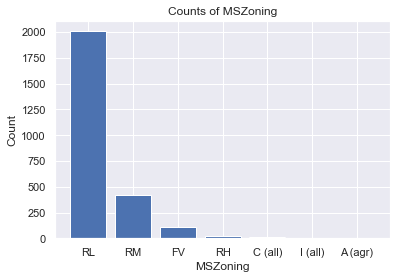

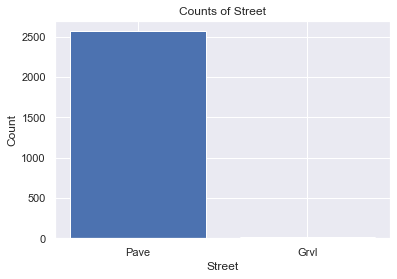

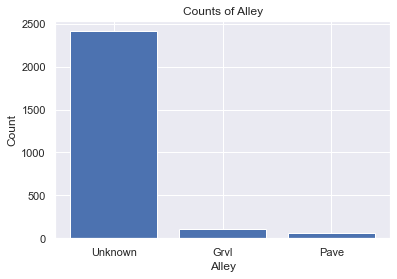

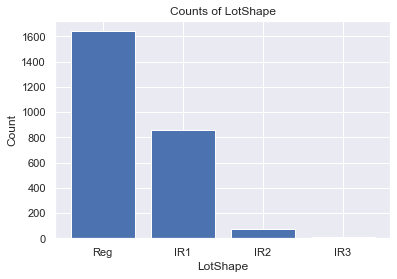

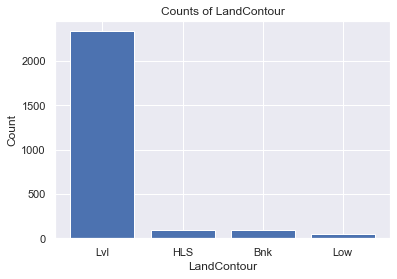

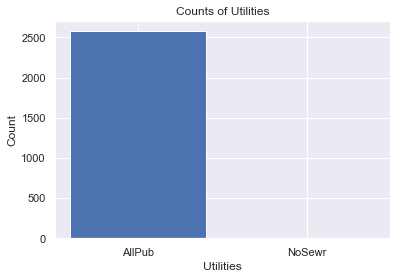

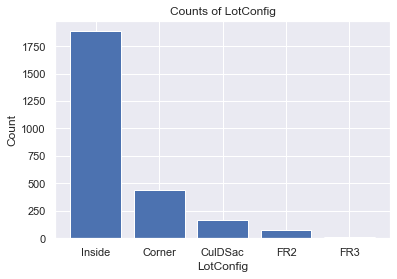

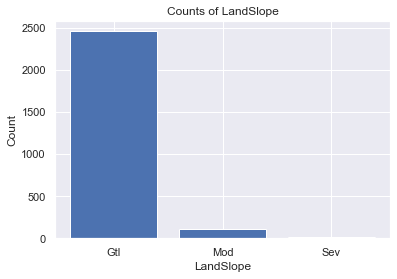

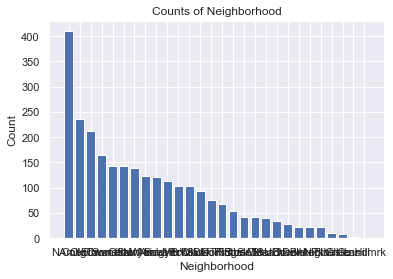

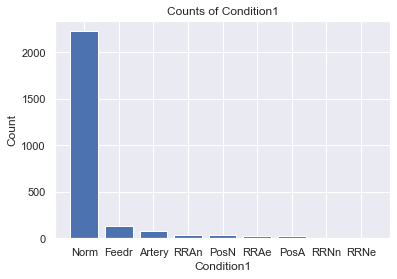

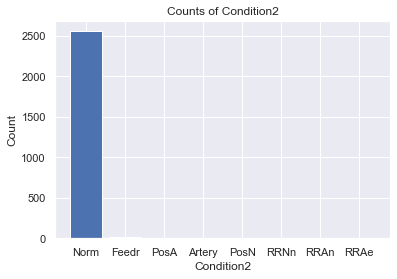

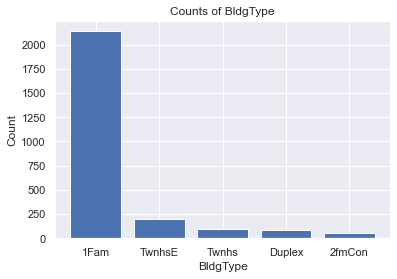

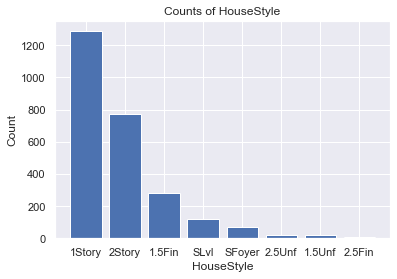

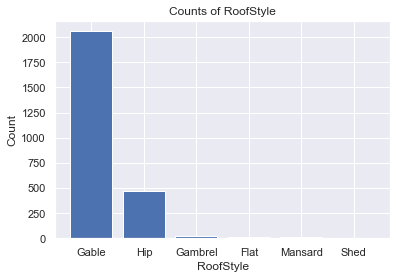

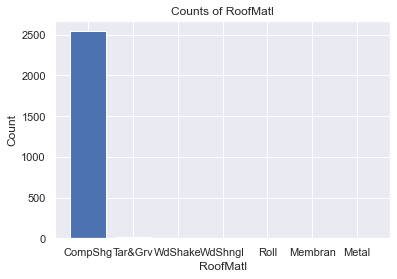

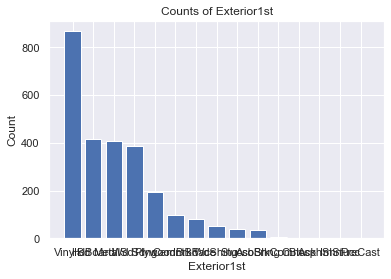

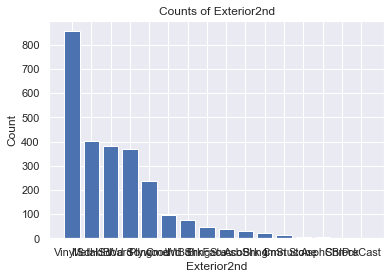

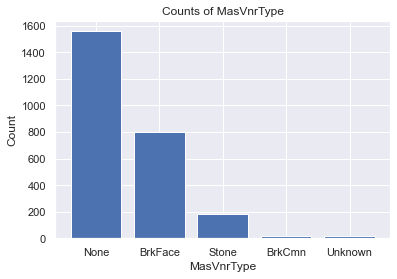

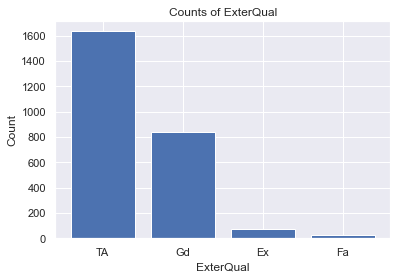

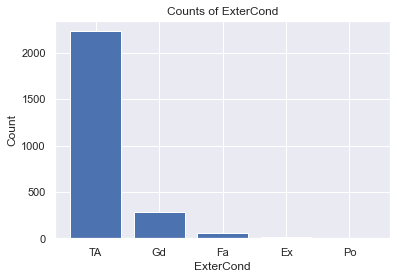

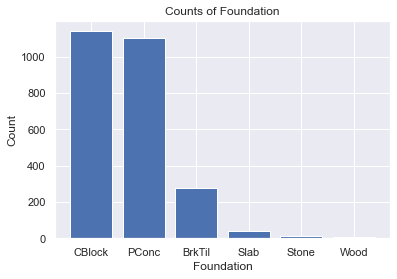

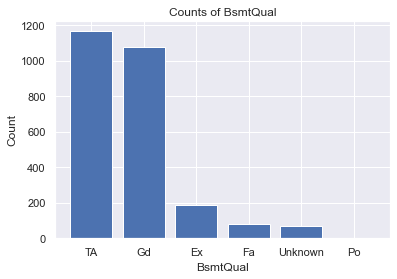

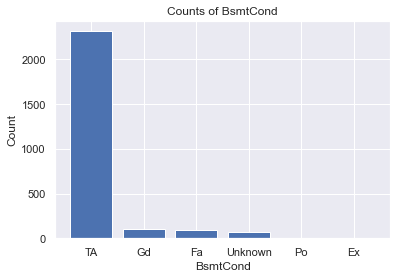

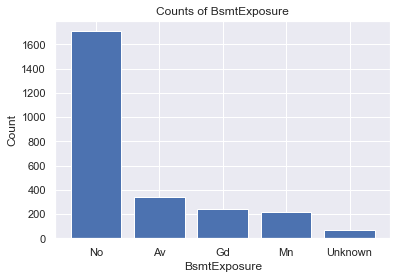

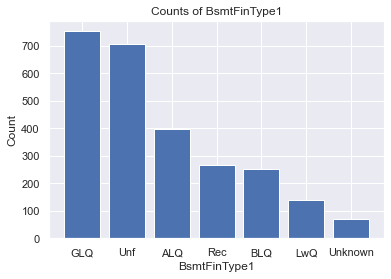

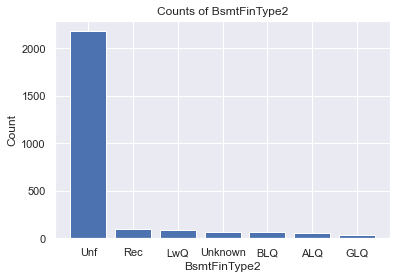

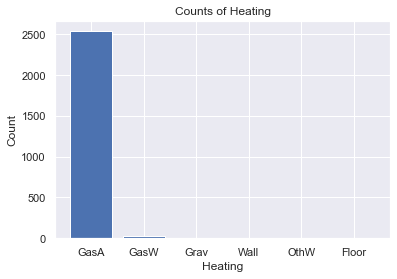

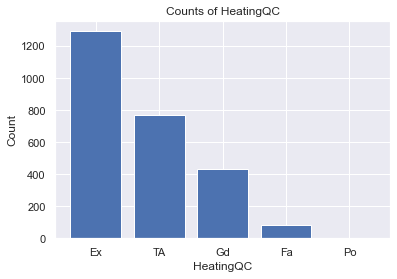

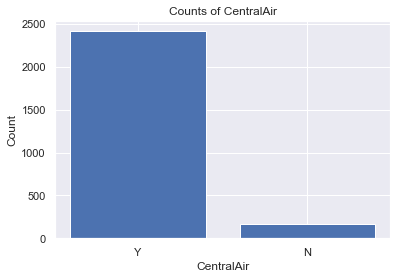

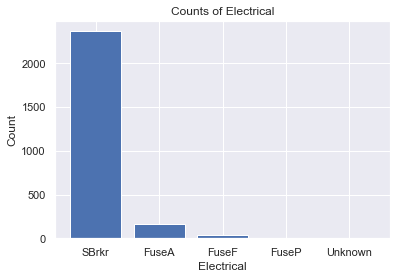

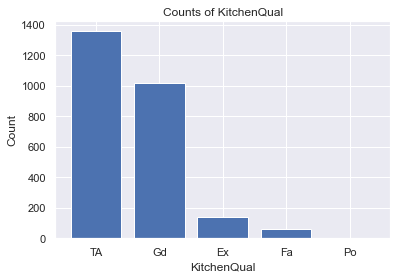

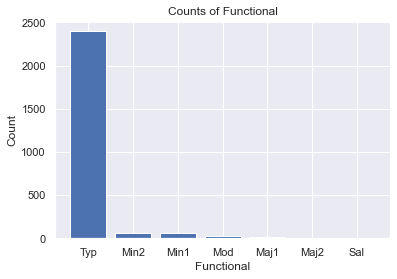

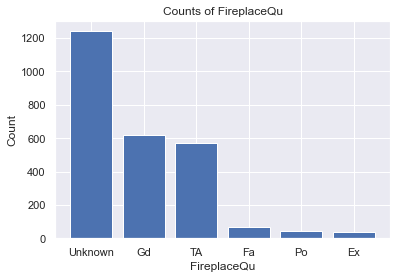

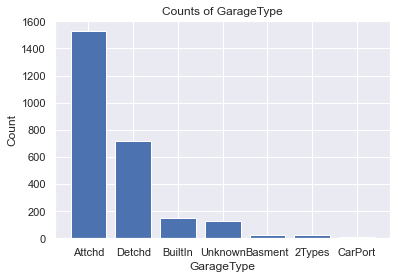

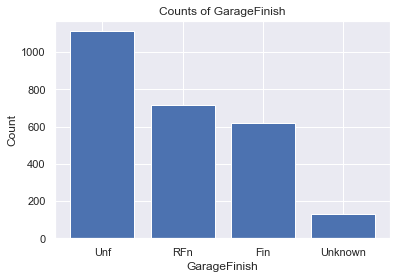

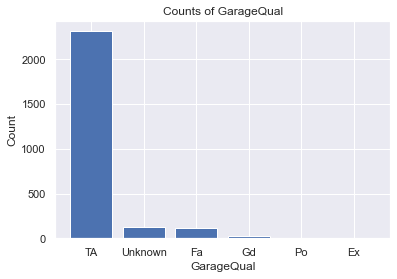

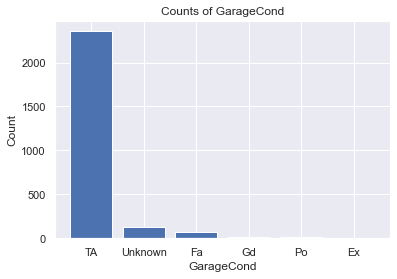

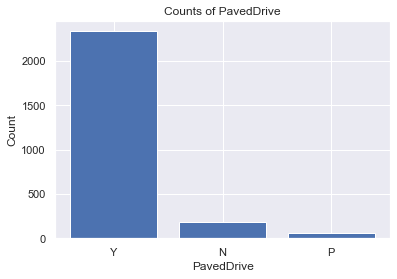

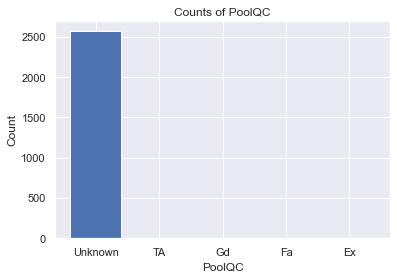

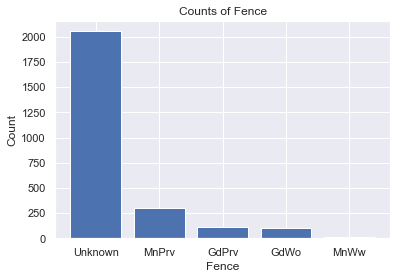

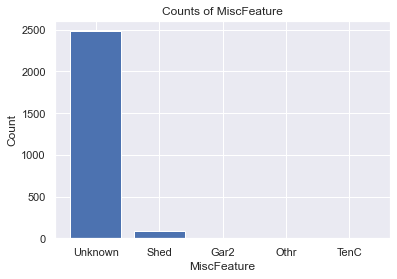

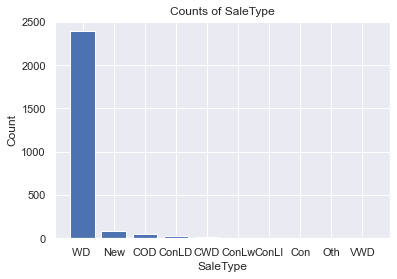

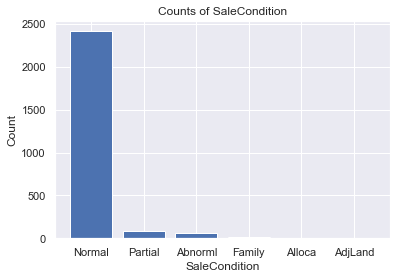

In [23]:
#EDA - categorical variables
#Explore categorical variables: If the dataset contains categorical variables, 
#use bar plots to visualize the frequency of each category. 
#This will help you understand the distribution of categorical variables.
ames_cat_column_list = ames_cat.columns.tolist()

for x in ames_cat_column_list:
    value_counts = ames_cat[x].value_counts()
    plt.bar(value_counts.index, value_counts.values)
    plt.title("Counts of " + str(x))
    plt.xlabel(x)
    plt.ylabel("Count")
    plt.show()

In [24]:
#From bar chart above, drop SaleCondition,SaleType,MiscFeature,PoolQC,GarageCond,GarageQual,Functional,
#Electrical,Heating, BsmtCond, BsmtExposure, RoofMatl,BldgType,Condition2, Condition1, LandSlope
#Utilities, LandContour, Alley, Fence,PavedDrive, Street since frequently the same category or have too many nulls.

ames_cat = ames_cat.drop(['SaleCondition', 'SaleType', 'MiscFeature', 'PoolQC', 
                          'GarageCond', 'GarageQual', 'Functional',                          
                          'Electrical', 'Heating','KitchenQual','BsmtCond', 'BsmtExposure', 
                          'RoofMatl', 'BldgType','FireplaceQu','GarageFinish','GarageType','Condition2',                          
                          'Condition1', 'LandSlope', 'Utilities', 
                          'LandContour', 'Alley', 'Street','Fence','PavedDrive'], axis=1)

ames_cat_column_list = ames_cat.columns.tolist()

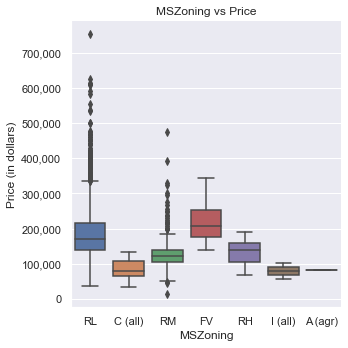

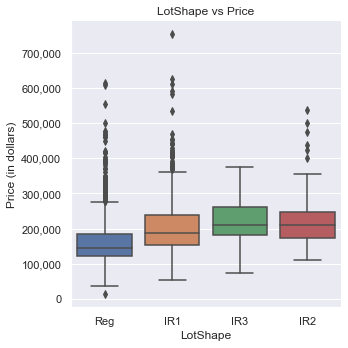

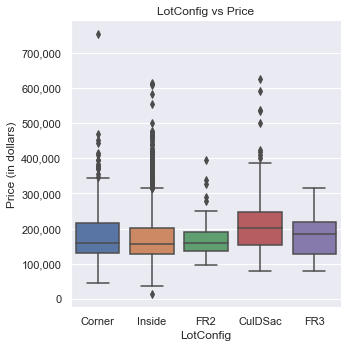

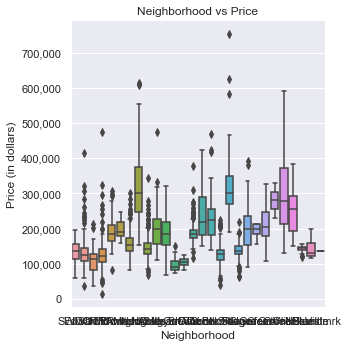

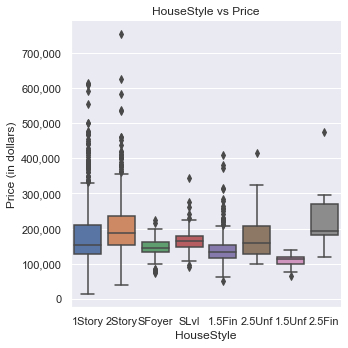

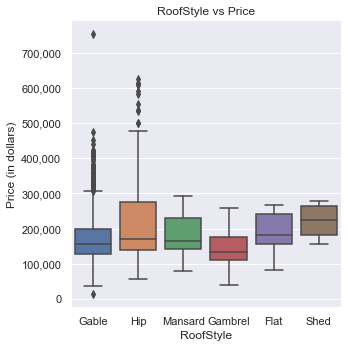

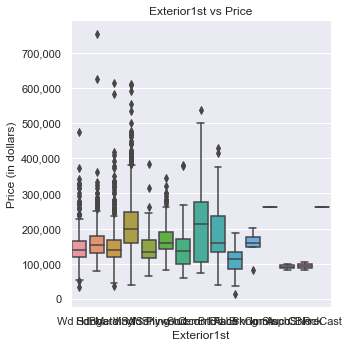

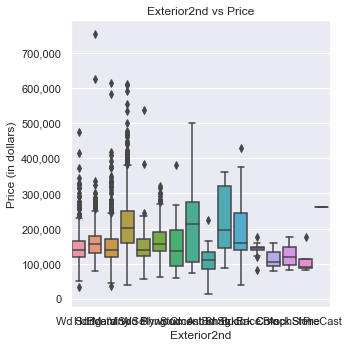

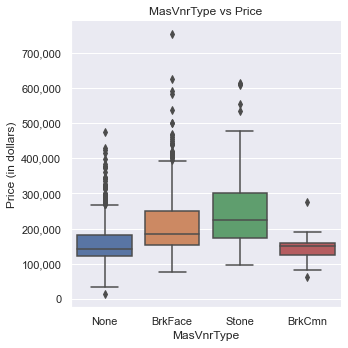

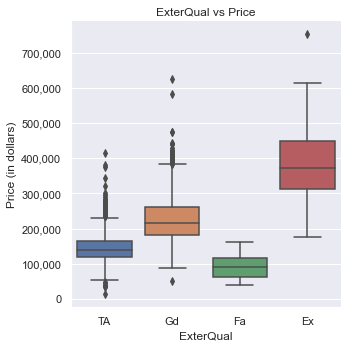

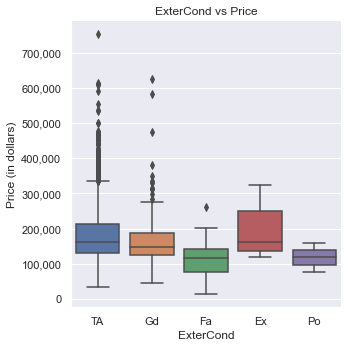

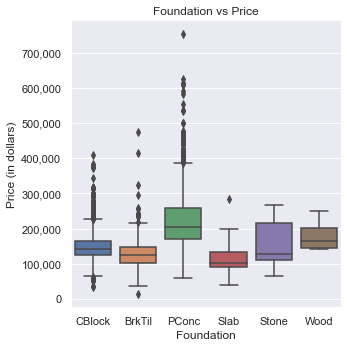

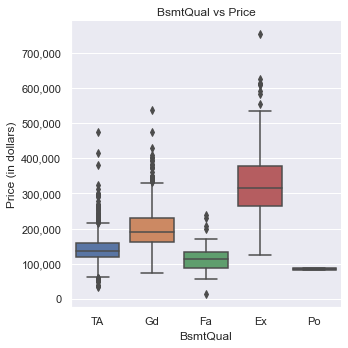

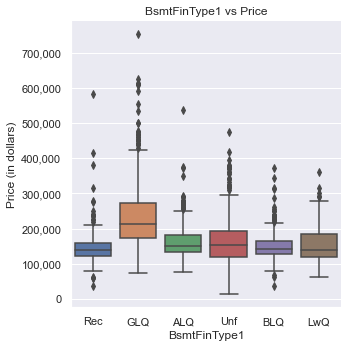

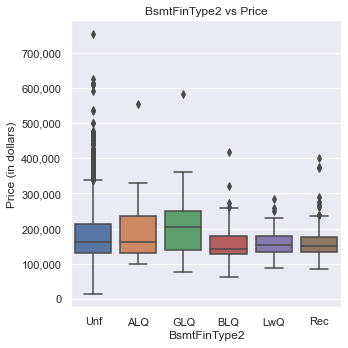

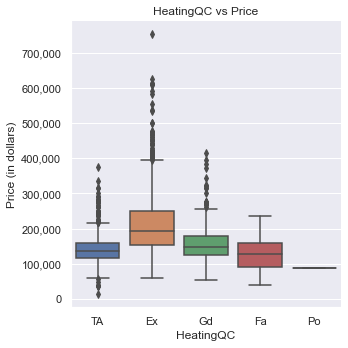

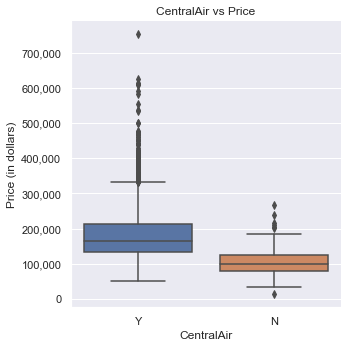

In [25]:
#EDA - categorical variables - boxplots

#Check for outliers: Use box plots to identify outliers in the dataset.
#This will help you decide how to handle outliers.

for x in ames_cat_column_list:
    fg=sns.catplot(data=ames,x=x,y='SalePrice',kind='box')
    sns.set()
    for ax in fg.axes.flat:
        ax.yaxis.set_major_formatter(ticker.StrMethodFormatter('{x:,.0f}'))
    plt.title(str(x)+' vs Price')
    plt.xlabel(x)
    plt.ylabel("Price (in dollars)")

    plt.tight_layout()
#So that axis show
    plt.show()

In [26]:
numerical_cols

GrLivArea  SalePrice  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
0        856.00  126000.00         6.00    1939.00       1950.00      238.00   
1       1049.00  139500.00         5.00    1984.00       1984.00      552.00   
2       1001.00  124900.00         5.00    1930.00       2007.00      737.00   
3       1039.00  114000.00         4.00    1900.00       2003.00        0.00   
4       1665.00  227000.00         8.00    2001.00       2001.00      643.00   
...         ...        ...          ...        ...           ...         ...   
2575     952.00  121000.00         6.00    1916.00       1950.00        0.00   
2576    1733.00  139600.00         3.00    1955.00       1955.00        0.00   
2577    2002.00  145000.00         5.00    1949.00       1950.00      284.00   
2578    1842.00  217500.00         7.00    2000.00       2000.00      841.00   
2579    1911.00  215000.00         8.00    1993.00       1994.00      380.00   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  BsmtFullBath  \
0           0.00     618.00       856.00    856.00      0.00          1.00   
1         393.00     104.00      1049.00   1049.00      0.00          1.00   
2           0.00     100.00       837.00   1001.00      0.00          0.00   
3           0.00     405.00       405.00    717.00    322.00          0.00   
4           0.00     167.00       810.00    810.00    855.00          1.00   
...          ...        ...          ...       ...       ...           ...   
2575        0.00     952.00       952.00    952.00      0.00          0.00   
2576        0.00       0.00         0.00   1733.00      0.00          0.00   
2577        0.00     717.00      1001.00   1001.00   1001.00          0.00   
2578        0.00     144.00       985.00    985.00    857.00          1.00   
2579        0.00     397.00       777.00   1065.00    846.00          0.00   

      BsmtHalfBath  FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
0             0.00      1.00      0.00          1.00          4.00   
1             0.00      2.00      0.00          1.00          5.00   
2             0.00      1.00      0.00          1.00          5.00   
3             0.00      1.00      0.00          1.00          6.00   
4             0.00      2.00      1.00          1.00          6.00   
...            ...       ...       ...           ...           ...   
2575          0.00      1.00      0.00          1.00          4.00   
2576          0.00      2.00      0.00          1.00          8.00   
2577          0.00      2.00      0.00          2.00          8.00   
2578          0.00      2.00      1.00          1.00          7.00   
2579          0.00      2.00      1.00          1.00          8.00   

      Fireplaces  GarageYrBlt  GarageArea  PoolArea  
0           1.00      1939.00      399.00      0.00  
1           0.00      1984.00      266.00      0.00  
2           0.00      1930.00      216.00      0.00  
3           0.00      1940.00      281.00      0.00  
4           0.00      2001.00      528.00      0.00  
...          ...          ...         ...       ...  
2575        1.00      1916.00      192.00      0.00  
2576        1.00      1955.00      452.00      0.00  
2577        0.00      1949.00      871.00      0.00  
2578        1.00      2000.00      486.00      0.00  
2579        1.00      1993.00      471.00      0.00  

[2580 rows x 21 columns]

In [27]:
imputed_data=ames_cat.join(numerical_cols)

In [28]:
#dataframe is called imputed_data
categorical_columns = imputed_data.select_dtypes(include=['object']).columns  # get the names of all categorical columns

# One-hot encode the categorical columns
imputed_data = pd.get_dummies(imputed_data, columns=categorical_columns, drop_first=True)

imputed_data.shape

(2580, 140)

In [29]:
#Check the dimensions of the dataset:
imputed_data

GrLivArea  SalePrice  OverallQual  YearBuilt  YearRemodAdd  BsmtFinSF1  \
1       1049.00  139500.00         5.00    1984.00       1984.00      552.00   
1       1049.00  139500.00         5.00    1984.00       1984.00      552.00   
1       1049.00  139500.00         5.00    1984.00       1984.00      552.00   
2       1001.00  124900.00         5.00    1930.00       2007.00      737.00   
2       1001.00  124900.00         5.00    1930.00       2007.00      737.00   
...         ...        ...          ...        ...           ...         ...   
996     1576.00  197000.00         7.00    2006.00       2006.00        0.00   
997     1728.00   84900.00         5.00    1962.00       2001.00     1500.00   
998     1352.00  158000.00         6.00    1969.00       1969.00      371.00   
999      912.00  156000.00         6.00    1978.00       1978.00      773.00   
1000    2000.00  305900.00         8.00    2004.00       2005.00     1464.00   

      BsmtFinSF2  BsmtUnfSF  TotalBsmtSF  1stFlrSF  2ndFlrSF  BsmtFullBath  \
1         393.00     104.00      1049.00   1049.00      0.00          1.00   
1         393.00     104.00      1049.00   1049.00      0.00          1.00   
1         393.00     104.00      1049.00   1049.00      0.00          1.00   
2           0.00     100.00       837.00   1001.00      0.00          0.00   
2           0.00     100.00       837.00   1001.00      0.00          0.00   
...          ...        ...          ...       ...       ...           ...   
996         0.00     770.00       770.00    778.00    798.00          0.00   
997         0.00     228.00      1728.00   1728.00      0.00          2.00   
998         0.00     292.00       663.00    663.00    689.00          0.00   
999         0.00     115.00       888.00    912.00      0.00          1.00   
1000        0.00     536.00      2000.00   2000.00      0.00          1.00   

      BsmtHalfBath  FullBath  HalfBath  KitchenAbvGr  TotRmsAbvGrd  \
1             0.00      2.00      0.00          1.00          5.00   
1             0.00      2.00      0.00          1.00          5.00   
1             0.00      2.00      0.00          1.00          5.00   
2             0.00      1.00      0.00          1.00          5.00   
2             0.00      1.00      0.00          1.00          5.00   
...            ...       ...       ...           ...           ...   
996           0.00      2.00      1.00          1.00          6.00   
997           0.00      2.00      0.00          2.00         10.00   
998           0.00      1.00      1.00          1.00          7.00   
999           0.00      1.00      0.00          1.00          5.00   
1000          0.00      2.00      0.00          1.00          8.00   

      Fireplaces  GarageYrBlt  GarageArea  PoolArea  MSZoning_C (all)  \
1           0.00      1984.00      266.00      0.00                 0   
1           0.00      1984.00      266.00      0.00                 0   
1           0.00      1984.00      266.00      0.00                 0   
2           0.00      1930.00      216.00      0.00                 0   
2           0.00      1930.00      216.00      0.00                 0   
...          ...          ...         ...       ...               ...   
996         0.00      2006.00      614.00      0.00                 0   
997         0.00      1958.20        0.00      0.00                 0   
998         0.00      1969.00      299.00      0.00                 0   
999         1.00      1978.00      470.00      0.00                 0   
1000        0.00      2004.00      888.00      0.00                 0   

      MSZoning_FV  MSZoning_I (all)  MSZoning_RH  MSZoning_RL  MSZoning_RM  \
1               0                 0            0            1            0   
1               0                 0            0            1            0   
1               0                 0            0            1            0   
2               0                 0            0            1            0   


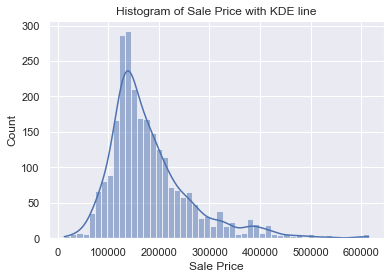

In [30]:
#Explore the distribution of the target variable:
# create a histogram of the SalePrice column with a KDE line
sns.histplot(data=imputed_data, x="SalePrice", kde=True)

# add labels and title to the plot
plt.xlabel('Sale Price')
plt.ylabel('Count')
plt.title('Histogram of Sale Price with KDE line')
plt.show()

In [31]:
#Use the describe() function to get basic statistics of the target variable, such as mean, standard deviation, minimum, 
# and maximum values.

imputed_data['SalePrice'].describe()

count     2580.00
mean    182122.88
std      83366.72
min      12789.00
25%     129850.00
50%     159750.00
75%     213562.50
max     615000.00
Name: SalePrice, dtype: float64

In [32]:
imputed_data.to_csv('imputed_data_handle_multicollinearity.csv')